Data shape: (91, 109, 91, 613)
Data type: float64
Running visualizations...
1. Quick slice view...


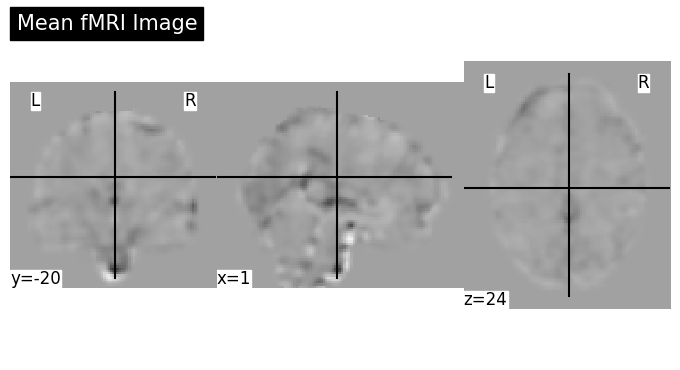

2. Manual slice view...


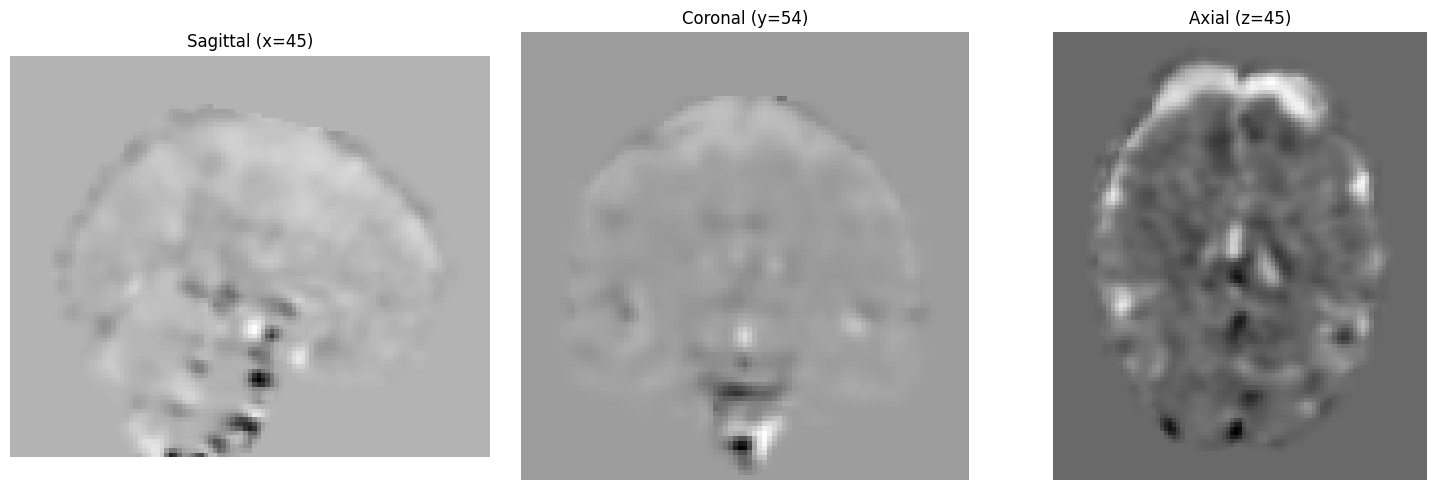

3. Time series from center voxel...


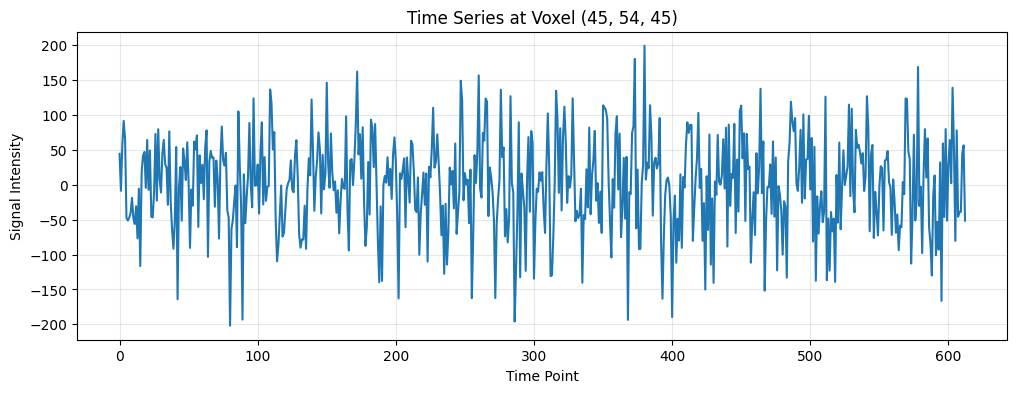

4. Summary statistics...


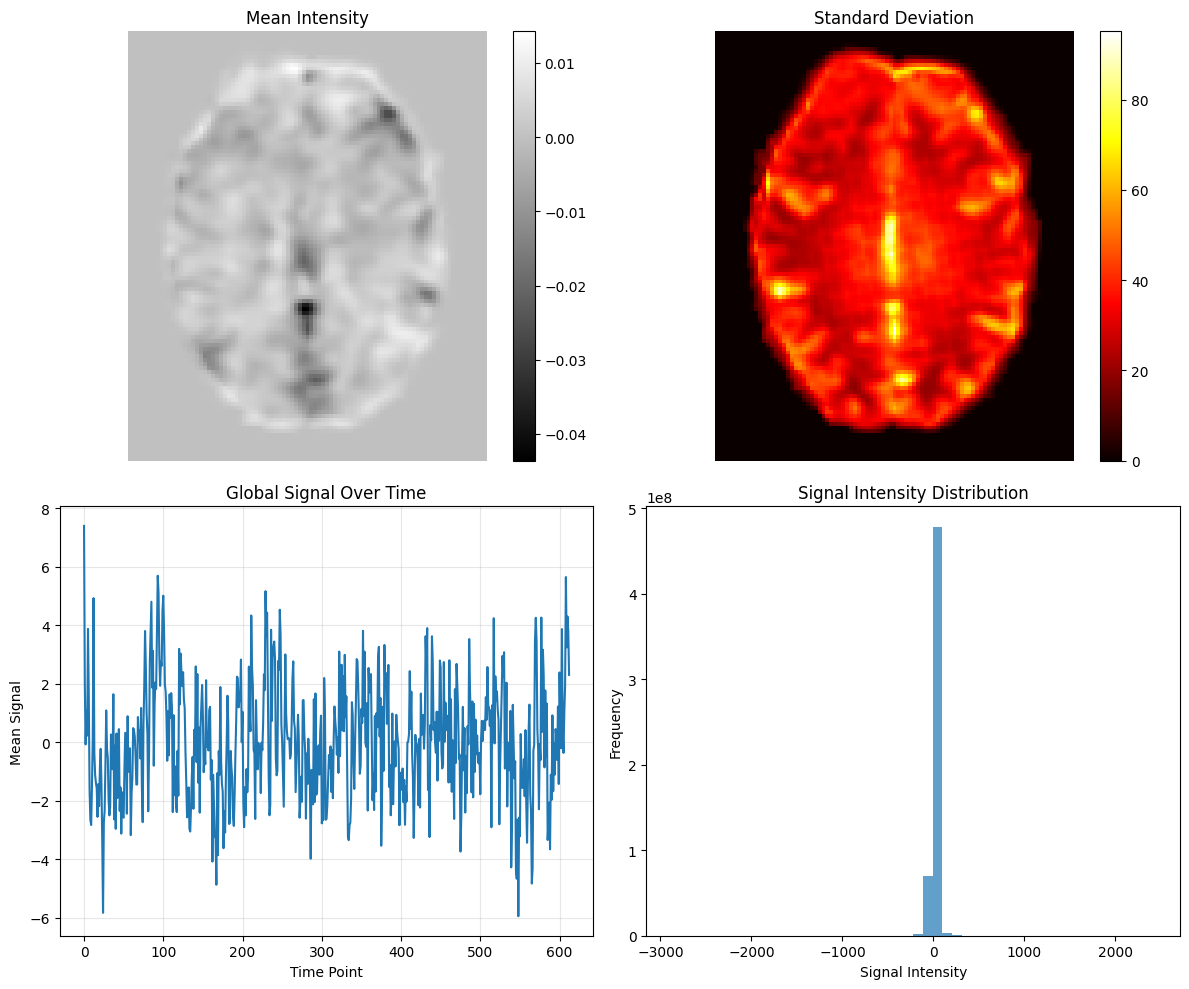

Visualization complete!


In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
from nilearn.datasets import load_mni152_template
import seaborn as sns

# Load your fMRI file
fmri_file = "/newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-1/func/sub-S01_ses-1_task-FirstBite_space-MNI_desc-ppres_bold.nii.gz"
fmri_img = nib.load(fmri_file)
fmri_data = fmri_img.get_fdata()

print(f"Data shape: {fmri_data.shape}")
print(f"Data type: {fmri_data.dtype}")

# Method 1: Quick slice viewing with nilearn
def quick_slice_view(fmri_file):
    """Quick way to view middle slices"""
    # Get mean image across time
    mean_img = image.mean_img(fmri_file)
    
    # Plot orthogonal slices
    plotting.plot_anat(mean_img, title="Mean fMRI Image")
    plt.show()

# Method 2: Manual slice viewing with matplotlib
def manual_slice_view(fmri_data, slice_idx=None, time_point=0):
    """View specific slices manually"""
    if slice_idx is None:
        slice_idx = fmri_data.shape[2] // 2  # middle slice
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Sagittal (x-slice)
    axes[0].imshow(fmri_data[fmri_data.shape[0]//2, :, :, time_point].T, 
                   cmap='gray', origin='lower')
    axes[0].set_title(f'Sagittal (x={fmri_data.shape[0]//2})')
    axes[0].axis('off')
    
    # Coronal (y-slice) 
    axes[1].imshow(fmri_data[:, fmri_data.shape[1]//2, :, time_point].T, 
                   cmap='gray', origin='lower')
    axes[1].set_title(f'Coronal (y={fmri_data.shape[1]//2})')
    axes[1].axis('off')
    
    # Axial (z-slice)
    axes[2].imshow(fmri_data[:, :, slice_idx, time_point].T, 
                   cmap='gray', origin='lower')
    axes[2].set_title(f'Axial (z={slice_idx})')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Method 3: Time series visualization
def plot_time_series(fmri_data, x=None, y=None, z=None):
    """Plot time series from a specific voxel"""
    if x is None:
        x, y, z = [dim//2 for dim in fmri_data.shape[:3]]
    
    time_series = fmri_data[x, y, z, :]
    
    plt.figure(figsize=(12, 4))
    plt.plot(time_series)
    plt.title(f'Time Series at Voxel ({x}, {y}, {z})')
    plt.xlabel('Time Point')
    plt.ylabel('Signal Intensity')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return time_series

# Method 4: Interactive brain viewer (if you have nilearn)
def interactive_view(fmri_file):
    """Create interactive brain viewer"""
    mean_img = image.mean_img(fmri_file)
    
    # This creates an interactive viewer
    view = plotting.view_img(mean_img, threshold=None)
    return view

# Method 5: Create a movie of time series
def create_brain_movie(fmri_data, slice_idx=None, output_gif=None):
    """Create animation showing brain activity over time"""
    if slice_idx is None:
        slice_idx = fmri_data.shape[2] // 2
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Determine data range for consistent colormap
    vmin = np.percentile(fmri_data[:, :, slice_idx, :], 1)
    vmax = np.percentile(fmri_data[:, :, slice_idx, :], 99)
    
    # Create frames
    frames = []
    for t in range(min(50, fmri_data.shape[3])):  # Limit to 50 frames
        ax.clear()
        im = ax.imshow(fmri_data[:, :, slice_idx, t].T, 
                      cmap='hot', vmin=vmin, vmax=vmax, origin='lower')
        ax.set_title(f'Time Point: {t}')
        ax.axis('off')
        
        if t == 0:
            plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
        if output_gif:
            plt.savefig(f'frame_{t:03d}.png', dpi=100, bbox_inches='tight')
    
    plt.show()

# Method 6: Statistical summary plots
def summary_plots(fmri_data):
    """Create summary statistics plots"""
    # Mean image
    mean_vol = np.mean(fmri_data, axis=3)
    std_vol = np.std(fmri_data, axis=3)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Mean intensity across time
    middle_slice = fmri_data.shape[2] // 2
    im1 = axes[0,0].imshow(mean_vol[:, :, middle_slice].T, cmap='gray', origin='lower')
    axes[0,0].set_title('Mean Intensity')
    axes[0,0].axis('off')
    plt.colorbar(im1, ax=axes[0,0])
    
    # Standard deviation
    im2 = axes[0,1].imshow(std_vol[:, :, middle_slice].T, cmap='hot', origin='lower')
    axes[0,1].set_title('Standard Deviation')
    axes[0,1].axis('off')
    plt.colorbar(im2, ax=axes[0,1])
    
    # Global signal over time
    global_signal = np.mean(fmri_data, axis=(0,1,2))
    axes[1,0].plot(global_signal)
    axes[1,0].set_title('Global Signal Over Time')
    axes[1,0].set_xlabel('Time Point')
    axes[1,0].set_ylabel('Mean Signal')
    axes[1,0].grid(True, alpha=0.3)
    
    # Signal distribution
    axes[1,1].hist(fmri_data.flatten(), bins=50, alpha=0.7)
    axes[1,1].set_title('Signal Intensity Distribution')
    axes[1,1].set_xlabel('Signal Intensity')
    axes[1,1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Run the visualizations
print("Running visualizations...")

# 1. Quick view
print("1. Quick slice view...")
quick_slice_view(fmri_file)

# 2. Manual slices
print("2. Manual slice view...")
manual_slice_view(fmri_data)

# 3. Time series from center voxel
print("3. Time series from center voxel...")
ts = plot_time_series(fmri_data)

# 4. Summary plots
print("4. Summary statistics...")
summary_plots(fmri_data)

# 5. Interactive view (uncomment if needed)
# print("5. Interactive view...")
# view = interactive_view(fmri_file)
# view.open_in_browser()  # or just 'view' in Jupyter

print("Visualization complete!")

# Optional: Extract specific regions if you have an atlas
def extract_roi_timeseries(fmri_file, atlas_file=None):
    """Extract time series from specific brain regions"""
    from nilearn.input_data import NiftiLabelsMasker
    
    if atlas_file is None:
        print("No atlas provided. Using Harvard-Oxford atlas...")
        from nilearn import datasets
        ho_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
        atlas_file = ho_atlas.maps
    
    masker = NiftiLabelsMasker(labels_img=atlas_file, standardize=True)
    roi_time_series = masker.fit_transform(fmri_file)
    
    return roi_time_series

# Uncomment to use:
# roi_ts = extract_roi_timeseries(fmri_file)

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load your fMRI file and convert to numpy array
fmri_file = "/newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-1/func/sub-S01_ses-1_task-FirstBite_space-MNI_desc-ppres_bold.nii.gz"
fmri_img = nib.load(fmri_file)
fmri_array = fmri_img.get_fdata()

print(fmri_array.shape)
fmri_array_mean = np.mean(fmri_array, axis=3)
print(fmri_array_mean.shape)

print(fmri_array_mean[45,20,45])
print(fmri_array_mean[20,20,:])

(91, 109, 91, 613)
(91, 109, 91)
-0.01716662270015449
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.82419440e-04  6.90204309e-04
  6.48086894e-04  4.68790647e-04  2.87121577e-04  9.45637723e-04
  1.21281511e-03  1.39466222e-03  1.64130938e-03  1.09562817e-03
  4.53506801e-04  1.93226712e-04  6.10640494e-04  1.59666321e-03
  3.11193244e-03  4.23417874e-03  4.70694360e-03  3.52500975e-03
  3.14551660e-03  3.21444266e-03  2.08117046e-03  3.90179783e-04
 -1.67335305e-03 -1.92253348e-03 -8.21810173e-04  1.62788336e-03
  2.02427330e-03  1.31863944e-03 -2.18568968e-04 -7.82410628e-04
 -6.57284629e-04 -1.75760387e-04  3.26068492e-06  2.43995880e-07
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.

In [ ]:
from dataset_new import *

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load your fMRI file and convert to numpy array
fmri_file = "/newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-1/func/sub-S01_ses-1_task-FirstBite_space-MNI_desc-ppres_bold.nii.gz"
fmri_img = nib.load(fmri_file)
fmri_array = fmri_img.get_fdata()
np.save('S01-FirstBite_all_voxels.npy', fmri_array)

'''
print(f"Original array shape: {fmri_array.shape}")

def load_durations(video, subject):
    """
    Load the fMRI onset and duration for a specific video and subject from a predefined path.

    Arguments:
        video (str): Name of the video.
        subject (str): Subject identifier.

    Returns:
        tuple: A tuple containing the onset time and video duration.
    """

    # you can change the path of the file containing the video durations
#    print("\n\n\nfound it\n\n\n")
    #durations_path = '/media/miplab-nas-shadow/Data2/Michael-GOTO-RCPNAS/ml-students2023/resources/run_onsets.pkl'
    
    durations_path = '/media/RCPNAS/MIP/Michael/ml-students2023/resources/run_onsets.pkl'
    onset = pd.read_pickle(durations_path)[video][subject][0]
    video_duration = load_processed_videos(video=video)[video].shape[0]

    return onset, video_duration

print(load_durations('FirstBite', 'S01'))
'''


'\nprint(f"Original array shape: {fmri_array.shape}")\n\ndef load_durations(video, subject):\n    """\n    Load the fMRI onset and duration for a specific video and subject from a predefined path.\n\n    Arguments:\n        video (str): Name of the video.\n        subject (str): Subject identifier.\n\n    Returns:\n        tuple: A tuple containing the onset time and video duration.\n    """\n\n    # you can change the path of the file containing the video durations\n#    print("\n\n\nfound it\n\n\n")\n    #durations_path = \'/media/miplab-nas-shadow/Data2/Michael-GOTO-RCPNAS/ml-students2023/resources/run_onsets.pkl\'\n    \n    durations_path = \'/media/RCPNAS/MIP/Michael/ml-students2023/resources/run_onsets.pkl\'\n    onset = pd.read_pickle(durations_path)[video][subject][0]\n    video_duration = load_processed_videos(video=video)[video].shape[0]\n\n    return onset, video_duration\n\nprint(load_durations(\'FirstBite\', \'S01\'))\n'

# Code for saving fmris with all voxels

In [ ]:
import nibabel as nib
import numpy as np

from dataset_new import *

'''
movies = [
  'Sintel',
  'Payload',
  'TearsOfSteel',
  'Superhero',
  'BigBuckBunny',
  'FirstBite',
  'BetweenViewings',
  'AfterTheRain',
  'TheSecretNumber',
  'Chatter',
  'Spaceman',
  'LessonLearned',
  'ToClaireFromSonny',
  'YouAgain'
          ]
'''
movies = [
[
'BigBuckBunny',
'FirstBite',
'YouAgain',
],

[
'AfterTheRain',
'LessonLearned',
'Payload',
'TheSecretNumber',
],

[
'BetweenViewings',
'Chatter',
'Spaceman',
'ToClaireFromSonny',
],

[
'Sintel',
'Superhero',
'TearsOfSteel',
]
]





for session in range(len(movies)):
    for movie in movies[session]:

        fmri_file = "/newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-" + str(session+1) + "/func/sub-S01_ses-" + str(session+1) +"_task-" + movie + "_space-MNI_desc-ppres_bold.nii.gz"
        fmri_img = nib.load(fmri_file)
        fmri_array = fmri_img.get_fdata()
        #np.save('S01-' + movie + '_all_voxels.npy', fmri_array)
        #data = np.load('S01-FirstBite_all_voxels.npy')
        data = fmri_array
        subject = 'sub-S01'
        onset, duration = load_durations(video = movie, subject = subject[4:])
        data = data[:,:,:,onset:onset+duration]
        #data = np.transpose(data,(1,0)) 
        np.save('fmris_all_voxels/S01-' + movie + '_all_voxels_processed.npy', data)


        # Load the data and mask
        #data = np.load('S01-FirstBite_all_voxels_processed.npy')
        mask = np.load('mask_4609+ffa.npy')

        print(f"Data shape: {data.shape}")
        print(f"Mask shape: {mask.shape}")
        print(f"Mask has {np.sum(mask > 0)} non-zero voxels")

        # Apply the mask to extract only the voxels where mask > 0
        if len(data.shape) == 4:  # If data is 4D (x, y, z, time)
            masked_data = data[mask > 0, :]  # Extract voxels across all timepoints
        elif len(data.shape) == 3:  # If data is 3D (x, y, z) 
            masked_data = data[mask > 0]
        else:
            print(f"Unexpected data shape: {data.shape}")

        print(f"Masked data shape: {masked_data.shape}")

        # Save the masked data
        np.save('fmris_4609+ffa/S01-' + movie + '_masked_4609+ffa.npy', masked_data)


#fmri_file = "/newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-1/func/sub-S01_ses-1_task-FirstBite_space-MNI_desc-ppres_bold.nii.gz"
#fmri_img = nib.load(fmri_file)
#fmri_array = fmri_img.get_fdata()
#np.save('S01-FirstBite_all_voxels.npy', fmri_array)

#data = np.load('S01-FirstBite_all_voxels.npy')
#name = 'FirstBite'
#subject = 'sub-S01'
#onset, duration = load_durations(video = name, subject = subject[4:])
#data = data[:,:,:,onset:onset+duration]
##data = np.transpose(data,(1,0)) 
#np.save('S01-FirstBite_all_voxels_processed.npy', data)

Data shape: (91, 109, 91, 376)
Mask shape: (91, 109, 91)
Mask has 4936 non-zero voxels
Masked data shape: (4936, 376)
Data shape: (91, 109, 91, 460)
Mask shape: (91, 109, 91)
Mask has 4936 non-zero voxels
Masked data shape: (4936, 460)
Data shape: (91, 109, 91, 613)
Mask shape: (91, 109, 91)
Mask has 4936 non-zero voxels
Masked data shape: (4936, 613)
Data shape: (91, 109, 91, 381)
Mask shape: (91, 109, 91)
Mask has 4936 non-zero voxels
Masked data shape: (4936, 381)
Data shape: (91, 109, 91, 513)
Mask shape: (91, 109, 91)
Mask has 4936 non-zero voxels
Masked data shape: (4936, 513)
Data shape: (91, 109, 91, 775)
Mask shape: (91, 109, 91)
Mask has 4936 non-zero voxels
Masked data shape: (4936, 775)
Data shape: (91, 109, 91, 603)
Mask shape: (91, 109, 91)
Mask has 4936 non-zero voxels
Masked data shape: (4936, 603)
Data shape: (91, 109, 91, 621)
Mask shape: (91, 109, 91)
Mask has 4936 non-zero voxels
Masked data shape: (4936, 621)
Data shape: (91, 109, 91, 311)
Mask shape: (91, 109, 91)

In [ ]:
#z-scoring

movies = [
'BigBuckBunny',
'FirstBite',
'YouAgain',
'AfterTheRain',
'LessonLearned',
'Payload',
'TheSecretNumber',
'BetweenViewings',
'Chatter',
'Spaceman',
'ToClaireFromSonny',
'Sintel',
'Superhero',
'TearsOfSteel'
]

for movie in movies:
    data = np.load('fmris_4609+ffa/S01-' + movie + '_masked_4609+ffa.npy')
    mean_per_voxel = np.mean(data, axis=1, keepdims=True)  # Shape: (4936, 1)
    std_per_voxel = np.std(data, axis=1, keepdims=True)    # Shape: (4936, 1)
    data_zscored = (data - mean_per_voxel) / std_per_voxel
    np.save('fmris_4609+ffa/S01-' + movie + '_masked_4609+ffa.npy', data_zscored)
    #print(data.shape)

    #mean_per_voxel = np.mean(data, axis=1, keepdims=True)  # Shape: (4936, 1)
    #std_per_voxel = np.std(data, axis=1, keepdims=True)    # Shape: (4936, 1)
#    print(mean_per_voxel)
#    print(std_per_voxel)
    #print(mean_per_voxel.shape)
    #print(std_per_voxel.shape)
    #data_zscored = (data - mean_per_voxel) / std_per_voxel

    #print("afterzscore (mean then std):")
    #print(np.mean(data_zscored, axis=1, keepdims=True))  # Shape: (4936, 1)
    #print(np.std(data_zscored, axis=1, keepdims=True))    # Shape: (4936, 1)

    #data = np.load('fmris_4609+ffa/S01-FirstBite_masked_4609+ffa.npy')
    #print(data_zscored.shape)

[[ 2.36217665e-18]
 [-1.41730599e-17]
 [ 1.65352365e-17]
 ...
 [ 1.88974132e-17]
 [ 2.36217665e-17]
 [ 0.00000000e+00]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[[-7.72329061e-18]
 [ 2.70315171e-17]
 [ 3.47548077e-17]
 ...
 [-3.86164530e-17]
 [ 1.54465812e-17]
 [ 2.31698718e-17]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[[-3.47737065e-17]
 [ 1.15912355e-17]
 [-1.73868532e-17]
 ...
 [ 2.31824710e-17]
 [-5.79561775e-18]
 [ 1.44890444e-17]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[[ 7.57632510e-18]
 [ 2.79741235e-17]
 [-1.39870617e-17]
 ...
 [ 4.66235391e-18]
 [ 0.00000000e+00]
 [ 3.26364774e-17]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[[-6.92536779e-18]
 [-2.07761034e-17]
 [ 1.38507356e-17]
 ...
 [-3.46268390e-18]
 [-3.11641551e-17]
 [ 0.00000000e+00]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[[-6.87622002e-18]
 [ 9.16829336e-18]
 [ 1.14603667e-17]
 ...
 [-2.75048801e-17]
 [ 3.43811001e-17]
 [ 2.29207334e-18]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[[ 2.94586541e-18]
 [-8.8375

# Make new trainset and testset (for subject 1)

In [8]:


def create_dataset_subject1(
        #subjects_folder, 
        output_dir="processed_data_new"):
    #sleep(10)
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Set the path to the main directory
    #main_dir = subjects_folder

    # List of subjects with known data issues (will be processed but marked)
    subjects_with_issues = ['sub-S02', 'sub-S21', 'sub-S26', 'sub-S30']
    
    # Find all subject directories
    #subject_dirs = sorted([d for d in os.listdir(main_dir) if (d.startswith('sub-') or d.startswith('average'))])
    #subject_dirs = sorted([d for d in os.listdir(main_dir) if (d.startswith('sub-S01') or d.startswith('average'))])
    #subject_dirs = sorted([d for d in os.listdir(main_dir) if (d.startswith('sub-S01'))])

    # Dictionaries to track all processed data
    all_train_data = {}
    all_test_data = {}
    all_val_data = {}
    test_movie = "YouAgain.npy"  # Movie reserved entirely for test set
    
    # Process each subject
    subject = 'sub-S01'

    #subject_path = os.path.join(main_dir, subject)
    subject_path='fmris_4609+ffa'
    
    # Skip if not a directory
    #if not os.path.isdir(subject_path):
    #    continue
    
    if subject in subjects_with_issues:
        print(f"Processing {subject} (NOTE: This subject has known data issues)...")
    else:
        print(f"Processing {subject}...")
    
    # Create output directories for this subject
    subject_output_dir = os.path.join(output_dir, subject)
    subject_val_dir = os.path.join(subject_output_dir, "val")
    subject_test_dir = os.path.join(subject_output_dir, "test")
    os.makedirs(subject_output_dir, exist_ok=True)
    os.makedirs(subject_val_dir, exist_ok=True)
    os.makedirs(subject_test_dir, exist_ok=True)
    
    # Get all .npy files for this subject
    npy_files = [f for f in os.listdir(subject_path) if f.endswith('.npy')]
    
    # Initialize arrays to collect this subject's training data
    subject_train_data = []
    
    # Dictionary to track test data for this subject by movie
    subject_test_data = {}
    subject_val_data = {}
    
    # Create a dictionary to track processing order and details for this subject
    processing_log = {
        "subject": subject,
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "train_order": [],
        "test_movies": {},
        "val_movies": {},
        "total_train_TRs": 0
    }
    
    # Track the cumulative index for data points in the concatenated training file
    cumulative_index = 0
    total_train_TRs = 0
    
    # Process each video file individually
    for npy_file in npy_files:
        file_path = os.path.join(subject_path, npy_file)
        video_name = os.path.splitext(npy_file)[0]  # Remove .npy extension to get video name
        
    #try:
        # Load the data
        data = np.load(file_path)

        subject_id_short = subject[4:] if subject.startswith('sub-') else subject

        print(f"  Processing {video_name} for {subject_id_short}")

        print("\n\nIt will load_durations with subject=" + str(subject_id_short), "\n\n")

        #if subject[:4] == 'sub-':
            # Taking care of onset of fMRI to make sure shapes between fMRI and video frames match
        #    onset, duration = load_durations(video=video_name, subject=subject_id_short)

        #    print("if it prints this, the error was not in load_durations")
            
            # Apply necessary slicing and transposing
        #    data = data[:, onset:onset+duration]
        data = np.transpose(data, (1, 0))
        
        # Z-score normalize the data
        #normalized_data = (data - np.mean(data)) / np.std(data)
        normalized_data = data
        
        # Determine if this movie is for test set or needs to be split
        if npy_file == test_movie:
            # Save entire movie to test data
            test_output_path = os.path.join(subject_test_dir, f"{video_name}.npy")
            np.save(test_output_path, normalized_data)
            
            test_TRs = normalized_data.shape[0]
            subject_test_data[video_name] = normalized_data.shape
            
            # Log test movie details
            processing_log["test_movies"][video_name] = {
                "type": "full_movie",
                "shape": normalized_data.shape,
                "TRs": test_TRs
            }
            
            print(f"    Saved {video_name} to test set, shape: {normalized_data.shape}, TRs: {test_TRs}")
        else:
            # Split into train (80%) and test (20%)
            #split train (64%), validation (16%), test (20%)
            split_idx1 = int(normalized_data.shape[0] * 0.64)
            if (video_name == 'Chatter' or video_name == 'TearsOfSteel' or video_name == 'BetweenViewings'):
                split_idx1 -= 1
            split_idx2 = int(normalized_data.shape[0] * 0.8)
            train_part = normalized_data[:split_idx1]
            val_part = normalized_data[split_idx1:split_idx2]
            test_part = normalized_data[split_idx2:]
            
            # Calculate TRs
            train_TRs = train_part.shape[0]
            val_TRs = val_part.shape[0]
            test_TRs = test_part.shape[0]
            
            # Update total train TRs
            total_train_TRs += train_TRs
            
            # Add training part to subject's training data
            subject_train_data.append(train_part)
            
            # Log the training portion details
            processing_log["train_order"].append({
                "movie": video_name,
                "portion": "first_80_percent",
                "train_shape": train_part.shape,
                "TRs": train_TRs,
                "start_index_in_combined": cumulative_index,
                "end_index_in_combined": cumulative_index + train_part.shape[0] - 1
            })
            
            # Update the cumulative index
            cumulative_index += train_part.shape[0]
            
            # Save test part
            test_output_path = os.path.join(subject_test_dir, f"{video_name}.npy")
            np.save(test_output_path, test_part)
            val_output_path = os.path.join(subject_val_dir, f"{video_name}.npy")
            np.save(val_output_path, val_part)
            
            subject_test_data[video_name] = test_part.shape
            subject_val_data[video_name] = val_part.shape
            
            # Log test portion details
            processing_log["test_movies"][video_name] = {
                "type": "last_20_percent",
                "shape": test_part.shape,
                "TRs": test_TRs
            }

            processing_log["val_movies"][video_name] = {
                "type": "middle_16_percent",
                "shape": val_part.shape,
                "TRs": val_TRs
            }
            
            print(f"    Added {video_name} to train set, shape: {train_part.shape}, TRs: {train_TRs}")
            print(f"    Saved {video_name} test portion to test set, shape: {test_part.shape}, TRs: {test_TRs}")
            print(f"    Saved {video_name} val portion to val set, shape: {val_part.shape}, TRs: {val_TRs}")
            
        #except Exception as e:
        #    print(f"  Error processing {file_path}: {e}")
    
    # Concatenate all training data for this subject
    if subject_train_data:
        subject_train_combined = np.concatenate(subject_train_data, axis=0)
        train_output_path = os.path.join(subject_output_dir, "train.npy")
        np.save(train_output_path, subject_train_combined)
        
        all_train_data[subject] = subject_train_combined.shape
        all_test_data[subject] = subject_test_data
        all_val_data[subject] = subject_val_data
        
        # Update processing log with combined shape
        processing_log["combined_train_shape"] = subject_train_combined.shape
        processing_log["total_train_TRs"] = total_train_TRs
        
        print(f"  Saved {subject} train data, shape: {subject_train_combined.shape}, Total TRs: {total_train_TRs}")
        
        # Save the processing log to JSON file for this subject
        log_path = os.path.join(subject_output_dir, "processing_order.json")
        with open(log_path, 'w') as f:
            json.dump(processing_log, f, indent=2)
        
        # Also save a more readable text version
        log_txt_path = os.path.join(subject_output_dir, "processing_order.txt")
        with open(log_txt_path, 'w') as f:
            f.write(f"fMRI Processing Order Log for {subject} - {processing_log['timestamp']}\n")
            f.write(f"\nCombined Training Data Shape: {processing_log['combined_train_shape']}\n")
            f.write(f"Total Training TRs: {processing_log['total_train_TRs']}\n")
            f.write("\nOrder of Movies in Training Data:\n")
            f.write("==============================\n")
            
            for idx, movie_info in enumerate(processing_log["train_order"]):
                f.write(f"{idx+1}. {movie_info['movie']}\n")
                f.write(f"   Training portion shape: {movie_info['train_shape']}\n")
                f.write(f"   TRs: {movie_info['TRs']}\n")
                f.write(f"   Position in combined file: {movie_info['start_index_in_combined']} to {movie_info['end_index_in_combined']}\n\n")
            
            f.write("\nValidation Movies:\n")
            f.write("===========\n")
            for movie, info in processing_log["val_movies"].items():
                f.write(f"{movie} - {info['type']}, Shape: {info['shape']}, TRs: {info['TRs']}\n")

            f.write("\nTest Movies:\n")
            f.write("===========\n")
            for movie, info in processing_log["test_movies"].items():
                f.write(f"{movie} - {info['type']}, Shape: {info['shape']}, TRs: {info['TRs']}\n")
        
        # Create a note file for subjects with known issues
        if subject in subjects_with_issues:
            note_path = os.path.join(subject_output_dir, "NOTE_DATA_ISSUES.txt")
            with open(note_path, 'w') as f:
                f.write(f"This subject ({subject}) has known data issues. Use with caution in your analysis.")

    # Print summary of all data shapes
    print("\nSummary of all train data shapes:")
    for subject, shape in all_train_data.items():
        if subject in subjects_with_issues:
            print(f"{subject} (NOTE: Has data issues): {shape}")
        else:
            print(f"{subject}: {shape}")
    
    print("\nSummary of all test data shapes by subject and movie:")
    for subject, movies in all_test_data.items():
        if subject in subjects_with_issues:
            print(f"\n{subject} (NOTE: Has data issues):")
        else:
            print(f"\n{subject}:")
        for movie, shape in movies.items():
            print(f"  {movie}: {shape}")

    print("\nSummary of all validation data shapes by subject and movie:")
    for subject, movies in all_test_data.items():
        if subject in subjects_with_issues:
            print(f"\n{subject} (NOTE: Has data issues):")
        else:
            print(f"\n{subject}:")
        for movie, shape in movies.items():
            print(f"  {movie}: {shape}")
    
    return all_train_data, all_test_data, all_val_data


create_dataset_subject1()

Processing sub-S01...
  Processing Spaceman for S01


It will load_durations with subject=S01 


    Added Spaceman to train set, shape: (396, 4936), TRs: 396
    Saved Spaceman test portion to test set, shape: (124, 4936), TRs: 124
    Saved Spaceman val portion to val set, shape: (99, 4936), TRs: 99
  Processing Sintel for S01


It will load_durations with subject=S01 


    Added Sintel to train set, shape: (355, 4936), TRs: 355
    Saved Sintel test portion to test set, shape: (111, 4936), TRs: 111
    Saved Sintel val portion to val set, shape: (89, 4936), TRs: 89
  Processing AfterTheRain for S01


It will load_durations with subject=S01 


    Added AfterTheRain to train set, shape: (243, 4936), TRs: 243
    Saved AfterTheRain test portion to test set, shape: (77, 4936), TRs: 77
    Saved AfterTheRain val portion to val set, shape: (61, 4936), TRs: 61
  Processing Chatter for S01


It will load_durations with subject=S01 


    Added Chatter to train set, shape: (198, 4936), TRs

({'sub-S01': (4321, 4936)},
 {'sub-S01': {'Spaceman': (124, 4936),
   'Sintel': (111, 4936),
   'AfterTheRain': (77, 4936),
   'Chatter': (63, 4936),
   'TearsOfSteel': (91, 4936),
   'BigBuckBunny': (76, 4936),
   'Superhero': (158, 4936),
   'ToClaireFromSonny': (62, 4936),
   'TheSecretNumber': (121, 4936),
   'BetweenViewings': (125, 4936),
   'LessonLearned': (103, 4936),
   'FirstBite': (92, 4936),
   'Payload': (155, 4936),
   'YouAgain': (613, 4936)}},
 {'sub-S01': {'Spaceman': (99, 4936),
   'Sintel': (89, 4936),
   'AfterTheRain': (61, 4936),
   'Chatter': (50, 4936),
   'TearsOfSteel': (73, 4936),
   'BigBuckBunny': (60, 4936),
   'Superhero': (127, 4936),
   'ToClaireFromSonny': (50, 4936),
   'TheSecretNumber': (97, 4936),
   'BetweenViewings': (100, 4936),
   'LessonLearned': (82, 4936),
   'FirstBite': (74, 4936),
   'Payload': (124, 4936)}})

In [4]:
a = np.load('processed_data/sub-S01/train.npy')
b = np.load('processed_data_new/sub-S01/train.npy')
c = np.load('processed_data_new/sub-S01/test/AfterTheRain.npy')
print(a.shape)
print(b.shape)
print(c.shape)

(5407, 4609)
(5407, 4936)
(77, 4936)


In [ ]:
from dataset_new import *

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1,2,3"


dataset_ID = 6661 # ID of a specific dataset. 6661 refer to preprocessed data with a mask of shape (4609,). 6660 refers to preprocessed data with a mask of shape (15364,)
mask_size = 4609 # number of voxels in the preprocessed fMRI data. either 4609 or 15364

trainset, valset, testset = get_dataset(dataset_ID, mask_size) # data are loaded into dictionaries

In [ ]:
from visualisation_new_2 import print_dict_tree

print_dict_tree(trainset)
print_dict_tree(valset)
print_dict_tree(testset)

fMRIs (shape: (4321, 4609))
videos (shape: (4321, 3, 112, 112, 32))
fMRIs
  Spaceman (shape: (99, 4609))
  Sintel (shape: (89, 4609))
  AfterTheRain (shape: (61, 4609))
  Chatter (shape: (50, 4609))
  TearsOfSteel (shape: (73, 4609))
  BigBuckBunny (shape: (60, 4609))
  Superhero (shape: (127, 4609))
  ToClaireFromSonny (shape: (50, 4609))
  TheSecretNumber (shape: (97, 4609))
  BetweenViewings (shape: (100, 4609))
  LessonLearned (shape: (82, 4609))
  FirstBite (shape: (74, 4609))
  Payload (shape: (124, 4609))
videos
  Spaceman (shape: (99, 3, 112, 112, 32))
  Sintel (shape: (89, 3, 112, 112, 32))
  AfterTheRain (shape: (61, 3, 112, 112, 32))
  Chatter (shape: (50, 3, 112, 112, 32))
  TearsOfSteel (shape: (73, 3, 112, 112, 32))
  BigBuckBunny (shape: (60, 3, 112, 112, 32))
  Superhero (shape: (127, 3, 112, 112, 32))
  ToClaireFromSonny (shape: (50, 3, 112, 112, 32))
  TheSecretNumber (shape: (97, 3, 112, 112, 32))
  BetweenViewings (shape: (100, 3, 112, 112, 32))
  LessonLearned (sha

In [ ]:
import numpy as np

c = np.load('processed_data/videos/videos.npy')
print(c.shape)

NameError: name 'np' is not defined

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1,2,3"

#from dataset import *
from models_new_2 import *
from visualisation_new_2 import *
import torch

from dataset_new import *
from models_new_2 import *
from visualisation_new_2 import *
from perturbation import *


### data loading ###

dataset_ID = 6661 # ID of a specific dataset. 6661 refer to preprocessed data with a mask of shape (4609,). 6660 refers to preprocessed data with a mask of shape (15364,)
mask_size = 4609 # number of voxels in the preprocessed fMRI data. either 4609 or 15364
trainset0, valset0, testset0 = get_dataset(dataset_ID, mask_size) # data are loaded into dictionaries




trainset = {}
trainset['fMRIs'] = np.load('processed_data_new/sub-S01/train.npy')
#trainset['fMRIs'] = np.memmap(f'encoder_dataset_{dataset_ID}/trainset/fMRIs.npy', dtype='float32', mode='r').reshape(-1, mask_size)
trainset['videos'] = np.memmap(f'encoder_dataset_{dataset_ID}/trainset/videos.npy', dtype='float32', mode='r').reshape(-1, 3, 112, 112, 32)


valset = {}
fMRIs, videos = {}, {}
path = 'processed_data_new/sub-S01/val'
for n in os.listdir(path):
    #print(os.listdir(path))
    name = n[:-4]     # -4 to remove the extension '.npy' 
    f_path = os.path.join(path, f'{name}.npy')
    if os.path.exists(f_path):
        fMRIs[name] = np.load(f_path)
    
    path = f'encoder_dataset_{dataset_ID}/valset'
    v_path = os.path.join(path, f'videos/{name}.npy')
    if os.path.exists(v_path):
        videos[name] = np.load(v_path, mmap_mode = 'r')
    path = 'processed_data_new/sub-S01/val'

valset['fMRIs'], valset['videos'] = fMRIs, videos

'''
testset = {}
fMRIs, videos = {}, {}
path = f'encoder_dataset_{dataset_ID}/testset'
for n in os.listdir(os.path.join(path, 'videos')):
    name = n[:-4]     # -4 to remove the extension '.npy' 
    f_path = os.path.join(path, f'fMRIs/{name}.npy')
    if os.path.exists(f_path):
        fMRIs[name] = np.load(f_path, mmap_mode = 'r')
    v_path = os.path.join(path, f'videos/{name}.npy')
    if os.path.exists(v_path):
        videos[name] = np.load(v_path, mmap_mode = 'r')
testset['fMRIs'], testset['videos'] = fMRIs, videos
'''

testset = {}
fMRIs, videos = {}, {}
path = 'processed_data_new/sub-S01/test'
for n in os.listdir(path):
    name = n[:-4]     # -4 to remove the extension '.npy' 
    f_path = os.path.join(path, f'{name}.npy')
    if os.path.exists(f_path):
        fMRIs[name] = np.load(f_path)
    
    path = f'encoder_dataset_{dataset_ID}/testset'
    v_path = os.path.join(path, f'videos/{name}.npy')
    if os.path.exists(v_path):
        videos[name] = np.load(v_path, mmap_mode = 'r')
    path = 'processed_data_new/sub-S01/test'
testset['fMRIs'], testset['videos'] = fMRIs, videos


print_dict_tree(trainset)
print_dict_tree(trainset0)
print("valset valset0:\n")
print_dict_tree(valset)
print_dict_tree(valset0)
print("testset testset0:\n")
print_dict_tree(testset)
print_dict_tree(testset0)

fMRIs (shape: (4321, 4936))
videos (shape: (4321, 3, 112, 112, 32))
fMRIs (shape: (4321, 4609))
videos (shape: (4321, 3, 112, 112, 32))
valset valset0:

fMRIs
  Spaceman (shape: (99, 4936))
  Sintel (shape: (89, 4936))
  AfterTheRain (shape: (61, 4936))
  Chatter (shape: (50, 4936))
  TearsOfSteel (shape: (73, 4936))
  BigBuckBunny (shape: (60, 4936))
  Superhero (shape: (127, 4936))
  ToClaireFromSonny (shape: (50, 4936))
  TheSecretNumber (shape: (97, 4936))
  BetweenViewings (shape: (100, 4936))
  LessonLearned (shape: (82, 4936))
  FirstBite (shape: (74, 4936))
  Payload (shape: (124, 4936))
videos
  Spaceman (shape: (99, 3, 112, 112, 32))
  Sintel (shape: (89, 3, 112, 112, 32))
  AfterTheRain (shape: (61, 3, 112, 112, 32))
  Chatter (shape: (50, 3, 112, 112, 32))
  TearsOfSteel (shape: (73, 3, 112, 112, 32))
  BigBuckBunny (shape: (60, 3, 112, 112, 32))
  Superhero (shape: (127, 3, 112, 112, 32))
  ToClaireFromSonny (shape: (50, 3, 112, 112, 32))
  TheSecretNumber (shape: (97, 3, 

In [2]:
import numpy as np

# Load the data and masks
masked_data_2d = np.load('S01-FirstBite_masked_data.npy')  # Shape: (num_voxels, TRs)
original_mask = np.load('mask_4609+ffa+ppa.npy')  # Shape: (91, 109, 91)
ffa_mask = np.load('enhanced_union_FFA.npy')  # Shape: (91, 109, 91)

print(f"Masked data shape: {masked_data_2d.shape}")
print(f"Original mask shape: {original_mask.shape}")
print(f"FFA mask shape: {ffa_mask.shape}")

# Get number of TRs
num_TRs = masked_data_2d.shape[1]

# Step 1: Create 4D array and put values back where they came from
data_4d = np.zeros((91, 109, 91, num_TRs))
data_4d[original_mask > 0, :] = masked_data_2d

print(f"Reconstructed 4D shape: {data_4d.shape}")

# Step 2: Zero out FFA voxels across all timepoints
data_4d[ffa_mask > 0, :] = 0

print(f"Zeroed out {np.sum(ffa_mask > 0)} FFA voxels across all timepoints")

# Step 3: Extract back to 2D using the same original mask
modified_data_2d = data_4d[original_mask > 0, :]

print(f"Final modified data shape: {modified_data_2d.shape}")
print(f"Should match original: {modified_data_2d.shape == masked_data_2d.shape}")

# Save the result
np.save('S01-FirstBite_masked_data_FFA_zeroed.npy', modified_data_2d)

Masked data shape: (10257, 460)
Original mask shape: (91, 109, 91)
FFA mask shape: (91, 109, 91)
Reconstructed 4D shape: (91, 109, 91, 460)
Zeroed out 334 FFA voxels across all timepoints
Final modified data shape: (10257, 460)
Should match original: True


In [ ]:
#process fmris

#data = np.load('S01-FirstBite_all_voxels_processed.npy')
#print(data.shape)

# Load the data and mask
data = np.load('S01-FirstBite_all_voxels_processed.npy')
mask = np.load('mask_4609+ffa.npy')

print(f"Data shape: {data.shape}")
print(f"Mask shape: {mask.shape}")
print(f"Mask has {np.sum(mask > 0)} non-zero voxels")

# Apply the mask to extract only the voxels where mask > 0
if len(data.shape) == 4:  # If data is 4D (x, y, z, time)
    masked_data = data[mask > 0, :]  # Extract voxels across all timepoints
elif len(data.shape) == 3:  # If data is 3D (x, y, z) 
    masked_data = data[mask > 0]
else:
    print(f"Unexpected data shape: {data.shape}")

print(f"Masked data shape: {masked_data.shape}")

# Save the masked data
np.save('S01-FirstBite_masked_4609+ffa.npy', masked_data)

Data shape: (91, 109, 91, 460)
Mask shape: (91, 109, 91)
Mask has 4936 non-zero voxels
Masked data shape: (4936, 460)


In [10]:
firstbiteoriginal = np.load('fMRIs_schaefer1000_4609/sub-S01/FirstBite.npy')

print(firstbiteoriginal.shape)

(4609, 613)


Original array shape: (91, 109, 91, 613)
Mean volume shape: (91, 109, 91)
Brain mask created: 323,185 brain voxels out of 902,629 total voxels
Brain coverage: 35.8%

Original volume statistics:
  Min: -0.07
  Max: 0.06
  Mean: -0.00
  Std: 0.00

Brain-only volume statistics:
  Min: -0.07
  Max: 0.06
  Mean: -0.00
  Std: 0.01

Y-dimension has 109 slices (anterior to posterior)
Showing middle slice (y=54) first...

1. Comparison view (original vs masked)...


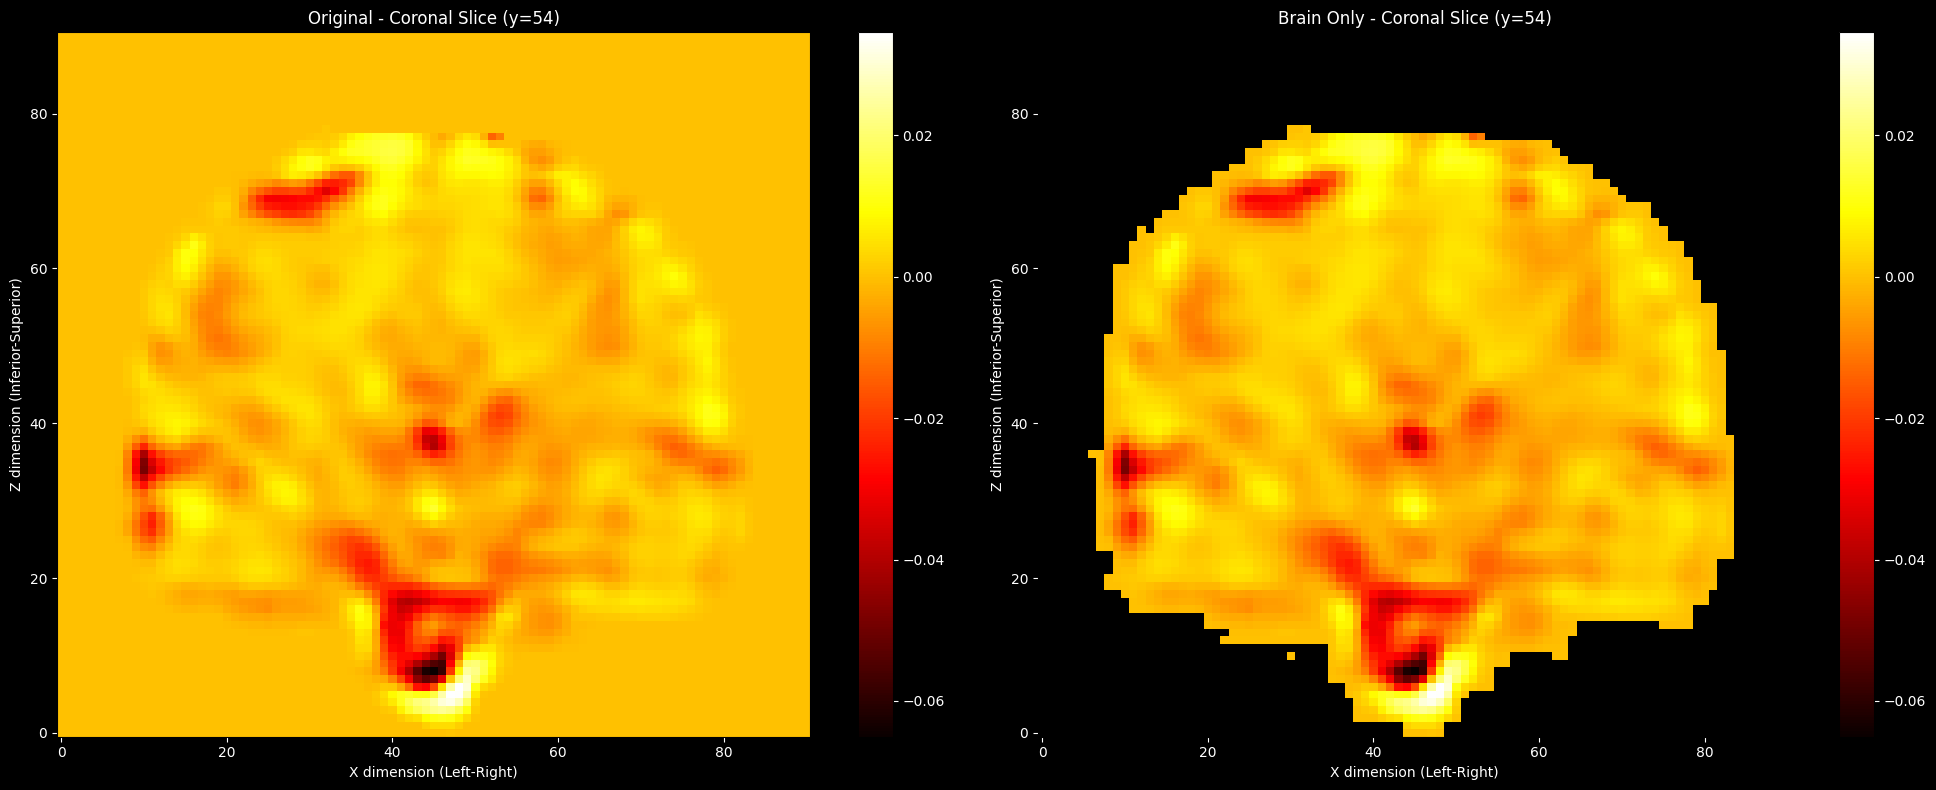


2. Brain-only coronal slice...


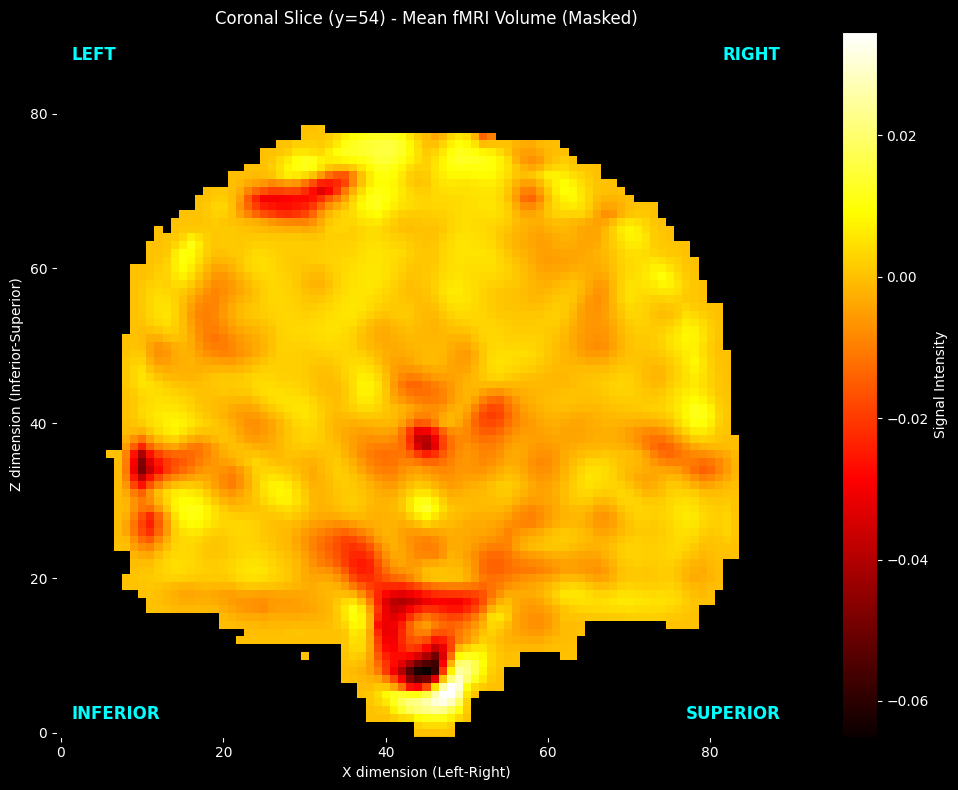


3. Multiple brain-only coronal slices...


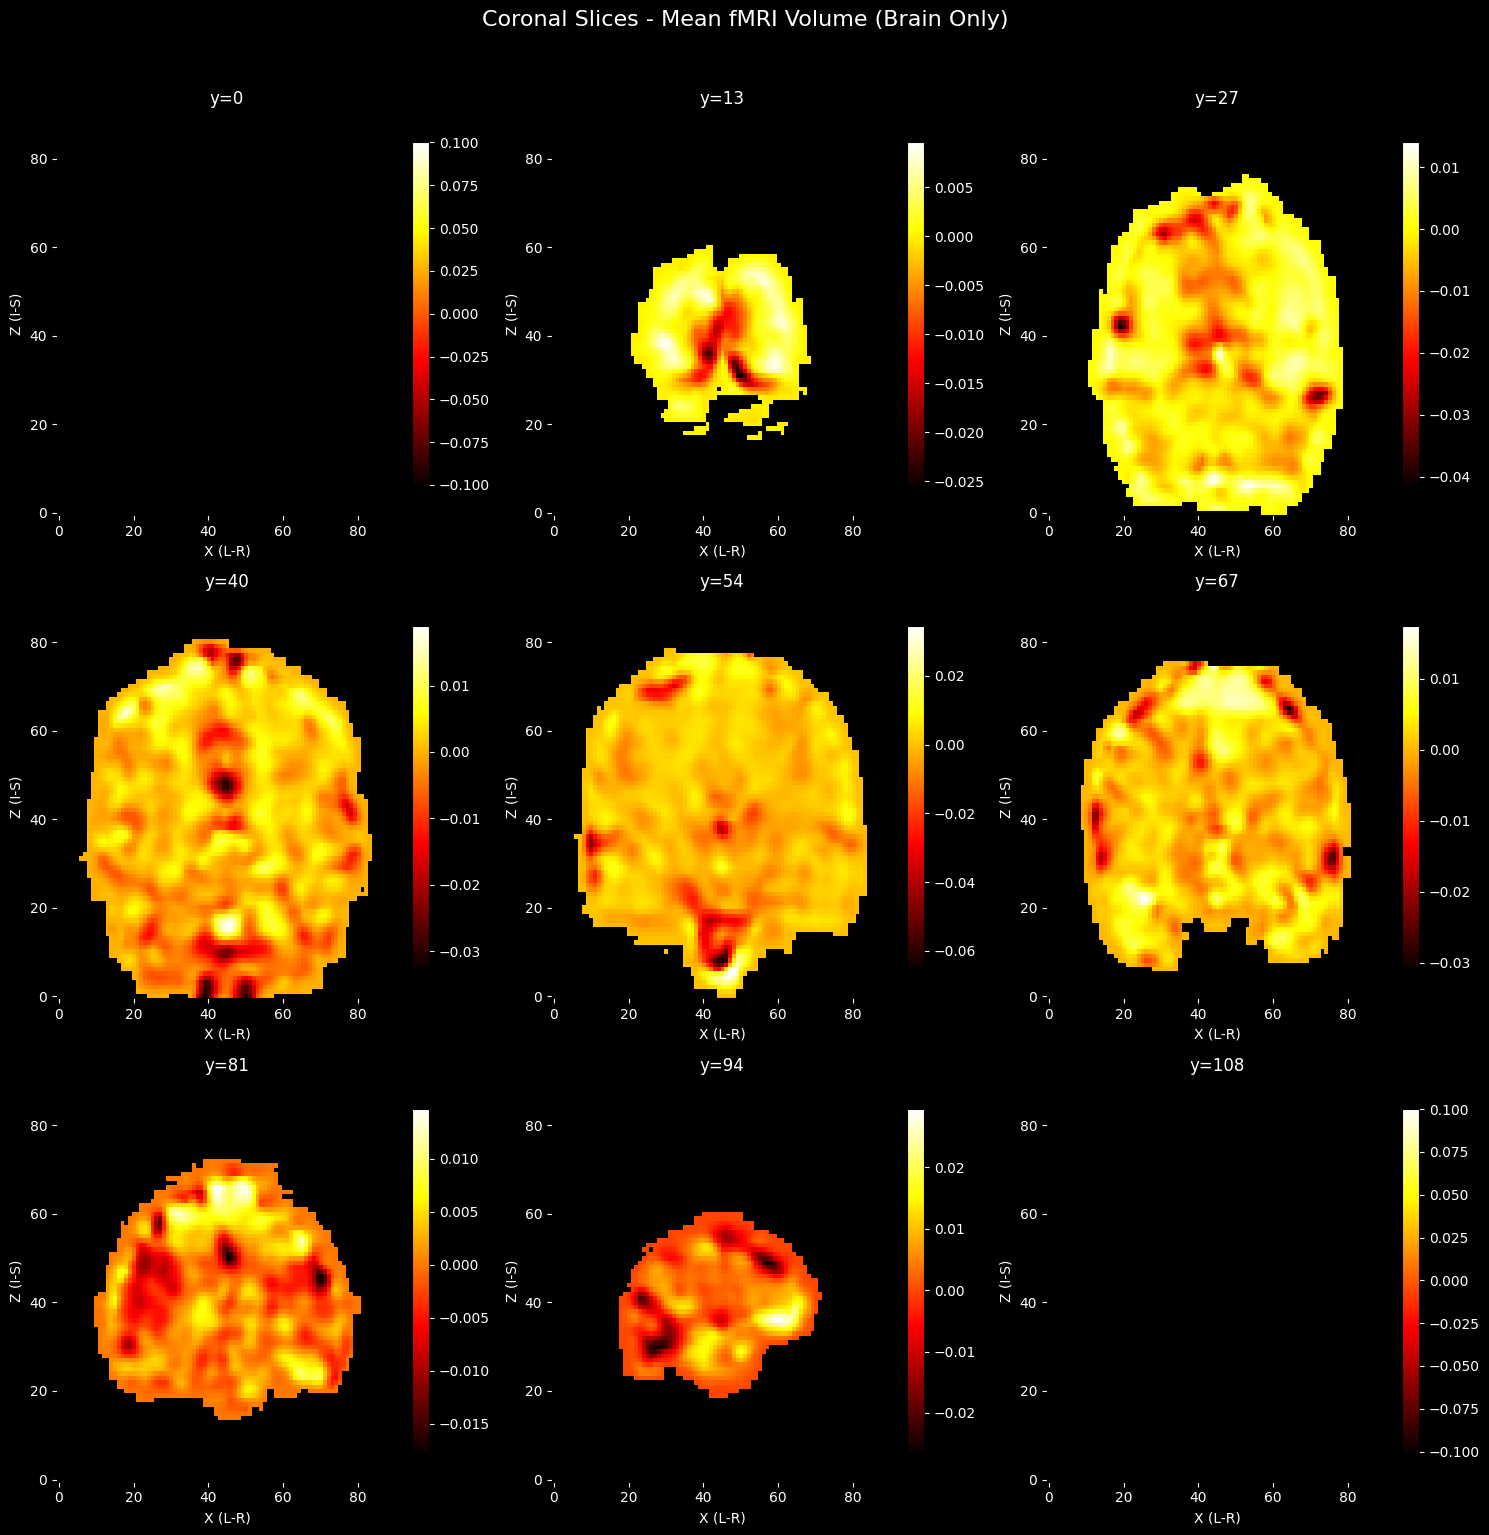


✅ Coronal view of mean fMRI volume complete!
   Volume shape: (91, 109, 91)
   Each slice shows brain from LEFT to RIGHT (x-axis)
   and INFERIOR to SUPERIOR (z-axis)

📋 Quick slice access:
   Anterior slices: mean_volume[:, 0:36, :]
   Middle slices:   mean_volume[:, 36:72, :]
   Posterior slices: mean_volume[:, 72:, :]


In [15]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load your fMRI file and convert to numpy array
fmri_file = "/newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-1/func/sub-S01_ses-1_task-FirstBite_space-MNI_desc-ppres_bold.nii.gz"
fmri_img = nib.load(fmri_file)
fmri_array = fmri_img.get_fdata()

print(f"Original array shape: {fmri_array.shape}")

# Calculate mean across time (axis=3) to get one volume
mean_volume = np.mean(fmri_array, axis=3)
print(f"Mean volume shape: {mean_volume.shape}")

# Create a brain mask (non-zero voxels)
brain_mask = mean_volume != 0
print(f"Brain mask created: {np.sum(brain_mask):,} brain voxels out of {brain_mask.size:,} total voxels")
print(f"Brain coverage: {100 * np.sum(brain_mask) / brain_mask.size:.1f}%")

# Apply mask to get only brain voxels
masked_volume = np.where(brain_mask, mean_volume, np.nan)

# Get dimensions
x_dim, y_dim, z_dim = mean_volume.shape

# Function to show single coronal slice
def show_coronal_slice(volume, y_slice=None, use_mask=True, show_comparison=False):
    """Show a single coronal slice with black background and optional masking"""
    if y_slice is None:
        y_slice = y_dim // 2  # middle slice
    
    # Choose which volume to display
    if use_mask:
        display_volume = masked_volume
        title_suffix = " (Masked)"
    else:
        display_volume = mean_volume
        title_suffix = " (Original)"
    
    # Coronal view: we slice along y-axis, showing x-z plane
    coronal_slice = display_volume[:, y_slice, :]
    
    if show_comparison:
        # Show both original and masked side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), facecolor='black')
        
        # Original
        ax1.set_facecolor('black')
        im1 = ax1.imshow(mean_volume[:, y_slice, :].T, cmap='hot', origin='lower', aspect='auto')
        ax1.set_title(f'Original - Coronal Slice (y={y_slice})', color='white')
        ax1.set_xlabel('X dimension (Left-Right)', color='white')
        ax1.set_ylabel('Z dimension (Inferior-Superior)', color='white')
        ax1.tick_params(colors='white')
        cbar1 = plt.colorbar(im1, ax=ax1)
        cbar1.ax.tick_params(colors='white')
        
        # Masked
        ax2.set_facecolor('black')
        im2 = ax2.imshow(masked_volume[:, y_slice, :].T, cmap='hot', origin='lower', aspect='auto')
        ax2.set_title(f'Brain Only - Coronal Slice (y={y_slice})', color='white')
        ax2.set_xlabel('X dimension (Left-Right)', color='white')
        ax2.set_ylabel('Z dimension (Inferior-Superior)', color='white')
        ax2.tick_params(colors='white')
        cbar2 = plt.colorbar(im2, ax=ax2)
        cbar2.ax.tick_params(colors='white')
        
    else:
        # Single plot
        plt.figure(figsize=(10, 8), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')
        
        # Use a colormap that looks good on black background
        plt.imshow(coronal_slice.T, cmap='hot', origin='lower', aspect='auto')
        plt.title(f'Coronal Slice (y={y_slice}) - Mean fMRI Volume{title_suffix}', color='white')
        plt.xlabel('X dimension (Left-Right)', color='white')
        plt.ylabel('Z dimension (Inferior-Superior)', color='white')
        
        # Colorbar with white text
        cbar = plt.colorbar(label='Signal Intensity')
        cbar.ax.yaxis.label.set_color('white')
        cbar.ax.tick_params(colors='white')
        
        # Add some brain orientation labels in bright colors
        plt.text(0.02, 0.98, 'LEFT', transform=plt.gca().transAxes, 
                 verticalalignment='top', color='cyan', fontsize=12, fontweight='bold')
        plt.text(0.98, 0.98, 'RIGHT', transform=plt.gca().transAxes, 
                 verticalalignment='top', horizontalalignment='right', color='cyan', fontsize=12, fontweight='bold')
        plt.text(0.02, 0.02, 'INFERIOR', transform=plt.gca().transAxes, 
                 verticalalignment='bottom', color='cyan', fontsize=12, fontweight='bold')
        plt.text(0.98, 0.02, 'SUPERIOR', transform=plt.gca().transAxes, 
                 verticalalignment='bottom', horizontalalignment='right', color='cyan', fontsize=12, fontweight='bold')
        
        # Set tick colors to white
        ax.tick_params(colors='white')
    
    plt.tight_layout()
    plt.show()
    
    return coronal_slice

# Function to show multiple coronal slices
def show_multiple_coronal_slices(volume, num_slices=9, use_mask=True):
    """Show multiple coronal slices in a grid with black background and masking"""
    # Choose which volume to display
    if use_mask:
        display_volume = masked_volume
        title_suffix = " (Brain Only)"
    else:
        display_volume = mean_volume
        title_suffix = " (Original)"
    
    # Select evenly spaced slices
    slice_indices = np.linspace(0, y_dim-1, num_slices, dtype=int)
    
    # Calculate grid dimensions
    cols = 3
    rows = (num_slices + cols - 1) // cols
    
    # Create figure with black background
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows), facecolor='black')
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, y_slice in enumerate(slice_indices):
        row = i // cols
        col = i % cols
        
        if row < rows and col < cols:
            coronal_slice = display_volume[:, y_slice, :]
            
            # Set subplot background to black
            axes[row, col].set_facecolor('black')
            
            # Use 'hot' colormap for black background
            im = axes[row, col].imshow(coronal_slice.T, cmap='hot', origin='lower', aspect='auto')
            axes[row, col].set_title(f'y={y_slice}', color='white')
            axes[row, col].set_xlabel('X (L-R)', color='white')
            axes[row, col].set_ylabel('Z (I-S)', color='white')
            
            # Set tick colors to white
            axes[row, col].tick_params(colors='white')
            
            # Add colorbar to each subplot with white text
            cbar = plt.colorbar(im, ax=axes[row, col], fraction=0.046, pad=0.04)
            cbar.ax.tick_params(colors='white')
    
    # Hide empty subplots and set their background to black
    for i in range(num_slices, rows * cols):
        row = i // cols
        col = i % cols
        if row < rows and col < cols:
            axes[row, col].set_visible(False)
            axes[row, col].set_facecolor('black')
    
    plt.suptitle(f'Coronal Slices - Mean fMRI Volume{title_suffix}', fontsize=16, y=1.02, color='white')
    plt.tight_layout()
    plt.show()

# Function for interactive slice selection
def interactive_coronal_viewer(volume):
    """Interactive coronal slice viewer with black background"""
    import matplotlib.widgets as widgets
    
    # Create figure with black background
    fig, (ax_slice, ax_controls) = plt.subplots(1, 2, figsize=(15, 6), 
                                               gridspec_kw={'width_ratios': [4, 1]},
                                               facecolor='black')
    ax_slice.set_facecolor('black')
    
    # Initial slice
    initial_slice = y_dim // 2
    coronal_slice = volume[:, initial_slice, :]
    im = ax_slice.imshow(coronal_slice.T, cmap='hot', origin='lower', aspect='auto')
    ax_slice.set_title(f'Coronal Slice (y={initial_slice})', color='white')
    ax_slice.set_xlabel('X dimension (Left-Right)', color='white')
    ax_slice.set_ylabel('Z dimension (Inferior-Superior)', color='white')
    ax_slice.tick_params(colors='white')
    
    # Colorbar with white text
    cbar = plt.colorbar(im, ax=ax_slice)
    cbar.set_label('Signal Intensity', color='white')
    cbar.ax.yaxis.label.set_color('white')
    cbar.ax.tick_params(colors='white')
    
    # Slider
    ax_slider = plt.axes([0.7, 0.3, 0.2, 0.03], facecolor='black')
    slider = widgets.Slider(ax_slider, 'Y Slice', 0, y_dim-1, 
                           valinit=initial_slice, valfmt='%d')
    
    def update_slice(val):
        y_slice = int(slider.val)
        new_slice = volume[:, y_slice, :]
        im.set_array(new_slice.T)
        im.set_clim(new_slice.min(), new_slice.max())
        ax_slice.set_title(f'Coronal Slice (y={y_slice})', color='white')
        fig.canvas.draw()
    
    slider.on_changed(update_slice)
    
    # Hide the controls axis
    ax_controls.set_visible(False)
    
    plt.show()

# Display basic info
print(f"\nOriginal volume statistics:")
print(f"  Min: {mean_volume.min():.2f}")
print(f"  Max: {mean_volume.max():.2f}")
print(f"  Mean: {mean_volume.mean():.2f}")
print(f"  Std: {mean_volume.std():.2f}")

print(f"\nBrain-only volume statistics:")
brain_values = mean_volume[brain_mask]
print(f"  Min: {brain_values.min():.2f}")
print(f"  Max: {brain_values.max():.2f}")
print(f"  Mean: {brain_values.mean():.2f}")
print(f"  Std: {brain_values.std():.2f}")

print(f"\nY-dimension has {y_dim} slices (anterior to posterior)")
print(f"Showing middle slice (y={y_dim//2}) first...")

# Show comparison of original vs masked
print(f"\n1. Comparison view (original vs masked)...")
show_coronal_slice(None, show_comparison=True)

# Show single middle coronal slice (masked)
print(f"\n2. Brain-only coronal slice...")
middle_slice = show_coronal_slice(None, use_mask=True)

# Show multiple slices (masked)
print(f"\n3. Multiple brain-only coronal slices...")
show_multiple_coronal_slices(None, use_mask=True)

# Optional: Interactive viewer (uncomment if you want it)
# print(f"\nStarting interactive viewer...")
# interactive_coronal_viewer(mean_volume)

# Save the mean volume if desired
save_mean = input("\nSave mean volume as .npy file? (y/n): ")
if save_mean.lower() == 'y':
    mean_file = fmri_file.replace('.nii.gz', '_mean.npy')
    np.save(mean_file, mean_volume)
    print(f"Mean volume saved as: {mean_file}")

print(f"\n✅ Coronal view of mean fMRI volume complete!")
print(f"   Volume shape: {mean_volume.shape}")
print(f"   Each slice shows brain from LEFT to RIGHT (x-axis)")
print(f"   and INFERIOR to SUPERIOR (z-axis)")

# Quick access to specific slices
print(f"\n📋 Quick slice access:")
print(f"   Anterior slices: mean_volume[:, 0:{y_dim//3}, :]")
print(f"   Middle slices:   mean_volume[:, {y_dim//3}:{2*y_dim//3}, :]") 
print(f"   Posterior slices: mean_volume[:, {2*y_dim//3}:, :]")

In [ ]:
import numpy as np
import nibabel as nib
import plotly.graph_objects as go
from nilearn import image
from scipy import ndimage
import os

target_shape = (91, 109, 91)
def resize_roi(roi_file):
    roi_img = nib.load(roi_file)
    roi_data = roi_img.get_fdata().astype(bool)
    zoom_factors = [target_shape[i] / roi_data.shape[i] for i in range(3)]
    resized_roi = ndimage.zoom(roi_data.astype(float), zoom_factors, order=0)
    return resized_roi.astype(bool)

rffa_resized = resize_roi('RFFA_roi.nii.gz')
lffa_resized = resize_roi('LFFA_roi.nii.gz')
ppa_resized = resize_roi('ppa_prob.nii')


def load_and_resample_roi(roi_path, reference_img_path, threshold=0.5):
    """
    Load ROI mask and resample to match reference image dimensions
    
    Parameters:
    - roi_path: path to ROI mask file
    - reference_img_path: path to reference fMRI file
    - threshold: threshold for binarizing probabilistic masks
    """
    if not os.path.exists(roi_path):
        print(f"Warning: ROI file not found: {roi_path}")
        return None, None
    
    try:
        # Load ROI and reference images
        roi_img = nib.load(roi_path)
        ref_img = nib.load(reference_img_path)
        
        print(f"Original ROI shape: {roi_img.shape}")
        print(f"Target shape: {ref_img.shape[:3]}")
        
        # Resample ROI to match reference image
        resampled_roi = image.resample_to_img(
            roi_img, ref_img, 
            interpolation='nearest',  # Use nearest neighbor for masks
            copy=True
        )
        
        # Get data and convert to binary mask
        roi_data = resampled_roi.get_fdata()
        
        # Handle 4D vs 3D
        if len(roi_data.shape) == 4:
            roi_data = roi_data[:, :, :, 0]  # Take first volume if 4D
        
        # Threshold for binary mask
        roi_mask = roi_data > threshold
        
        print(f"Resampled ROI shape: {roi_mask.shape}")
        print(f"ROI voxels: {np.sum(roi_mask):,}")
        
        return roi_mask, roi_data
        
    except Exception as e:
        print(f"Error processing {roi_path}: {str(e)}")
        return None, None

def calculate_overlap_stats(brain_mask, roi_mask, roi_name):
    """Calculate overlap statistics between brain and ROI masks"""
    if roi_mask is None:
        return None
    
    # Calculate overlaps
    roi_voxels = np.sum(roi_mask)
    brain_voxels = np.sum(brain_mask)
    overlap_voxels = np.sum(brain_mask & roi_mask)
    
    # Calculate percentages
    roi_in_brain = (overlap_voxels / roi_voxels * 100) if roi_voxels > 0 else 0
    brain_covered_by_roi = (overlap_voxels / brain_voxels * 100) if brain_voxels > 0 else 0
    
    stats = {
        'name': roi_name,
        'roi_voxels': roi_voxels,
        'brain_voxels': brain_voxels,
        'overlap_voxels': overlap_voxels,
        'roi_in_brain_percent': roi_in_brain,
        'brain_covered_percent': brain_covered_by_roi
    }
    
    return stats

def create_3d_brain_with_rois(volume, brain_mask, roi_masks_dict, 
                             threshold_percentile=70, max_points_per_region=15000,
                             colorscale='viridis'):
    """
    Create 3D plot with brain and ROI masks
    
    Parameters:
    - volume: 3D brain volume
    - brain_mask: 3D brain mask
    - roi_masks_dict: dict with ROI names as keys, masks as values
    - threshold_percentile: threshold for brain intensity
    - max_points_per_region: max points to show per region
    """
    
    fig = go.Figure()
    
    # 1. Add brain tissue (background, lower opacity)
    brain_coords = np.where(brain_mask)
    brain_values = volume[brain_mask]
    
    # Threshold brain data
    if threshold_percentile > 0:
        threshold = np.percentile(brain_values, threshold_percentile)
        above_threshold = brain_values >= threshold
        brain_x = brain_coords[0][above_threshold]
        brain_y = brain_coords[1][above_threshold]
        brain_z = brain_coords[2][above_threshold]
        brain_intensities = brain_values[above_threshold]
    else:
        brain_x, brain_y, brain_z = brain_coords
        brain_intensities = brain_values
    
    # Subsample brain for performance
    if len(brain_x) > max_points_per_region:
        indices = np.random.choice(len(brain_x), max_points_per_region, replace=False)
        brain_x = brain_x[indices]
        brain_y = brain_y[indices]
        brain_z = brain_z[indices]
        brain_intensities = brain_intensities[indices]
    
    # Add brain tissue trace
    fig.add_trace(go.Scatter3d(
        x=brain_x,
        y=brain_y,
        z=brain_z,
        mode='markers',
        marker=dict(
            size=1.5,
            color=brain_intensities,
            colorscale=colorscale,
            opacity=0.3,  # Lower opacity so ROIs stand out
            colorbar=dict(
                title=dict(text="Brain Signal", font=dict(size=12)),
                x=1.1
            )
        ),
        name='Brain Tissue',
        hovertemplate='<b>Brain</b><br>Coords: (%{x}, %{y}, %{z})<extra></extra>'
    ))
    
    # 2. Add ROI regions with vibrant colors
    roi_colors = ['red', 'lime', 'cyan', 'magenta', 'yellow', 'orange']
    
    for i, (roi_name, roi_mask) in enumerate(roi_masks_dict.items()):
        if roi_mask is None:
            continue
            
        # Get ROI coordinates
        roi_coords = np.where(roi_mask)
        
        if len(roi_coords[0]) == 0:
            print(f"No voxels found in {roi_name}")
            continue
        
        roi_x, roi_y, roi_z = roi_coords
        
        # Subsample ROI for performance
        if len(roi_x) > max_points_per_region:
            indices = np.random.choice(len(roi_x), max_points_per_region, replace=False)
            roi_x = roi_x[indices]
            roi_y = roi_y[indices]
            roi_z = roi_z[indices]
        
        # Add ROI trace
        color = roi_colors[i % len(roi_colors)]
        fig.add_trace(go.Scatter3d(
            x=roi_x,
            y=roi_y,
            z=roi_z,
            mode='markers',
            marker=dict(
                size=4,  # Larger than brain
                color=color,
                opacity=0.9  # High opacity to stand out
            ),
            name=roi_name,
            hovertemplate=f'<b>{roi_name}</b><br>Coords: (%{{x}}, %{{y}}, %{{z}})<extra></extra>'
        ))
        
        print(f"Added {roi_name}: {len(roi_x):,} voxels in {color}")
    
    # Update layout
    fig.update_layout(
        title=dict(
            text='3D Brain with ROI Masks',
            x=0.5,
            font=dict(size=16, color='white')
        ),
        scene=dict(
            xaxis_title='X (Left → Right)',
            yaxis_title='Y (Posterior → Anterior)',
            zaxis_title='Z (Inferior → Superior)',
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
            bgcolor='black',
            xaxis=dict(backgroundcolor='black', gridcolor='gray'),
            yaxis=dict(backgroundcolor='black', gridcolor='gray'),
            zaxis=dict(backgroundcolor='black', gridcolor='gray')
        ),
        width=1200,
        height=900,
        paper_bgcolor='black',
        plot_bgcolor='black',
        font=dict(color='white'),
        showlegend=True,
        legend=dict(
            x=0.02,
            y=0.98,
            bgcolor='rgba(0,0,0,0.8)',
            bordercolor='white',
            borderwidth=1
        )
    )
    
    return fig

# Main execution
print("🧠 Loading and processing ROI masks...")

# Your file paths (update these to match your directory)
fmri_file = "/newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-1/func/sub-S01_ses-1_task-FirstBite_space-MNI_desc-ppres_bold.nii.gz"

# ROI file paths - update these to your actual paths
roi_files = {
    'PPA': 'ppa_prob.nii',
    'Left FFA': 'LFFA_roi.nii.gz', 
    'Right FFA': 'RFFA_roi.nii.gz'
}

print(f"Reference fMRI file: {fmri_file}")

# Load and resample ROI masks
roi_masks = {}
roi_stats = []

for roi_name, roi_path in roi_files.items():
    print(f"\n--- Processing {roi_name} ---")
    roi_mask, roi_data = load_and_resample_roi(roi_path, fmri_file, threshold=0.1)
    
    if roi_mask is not None:
        roi_masks[roi_name] = roi_mask
        
        # Calculate overlap statistics
        stats = calculate_overlap_stats(brain_mask, roi_mask, roi_name)
        if stats:
            roi_stats.append(stats)
            
            print(f"✅ {roi_name} loaded successfully:")
            print(f"   ROI voxels: {stats['roi_voxels']:,}")
            print(f"   Overlap with brain: {stats['overlap_voxels']:,} voxels")
            print(f"   {stats['roi_in_brain_percent']:.1f}% of ROI is in brain")
            print(f"   ROI covers {stats['brain_covered_percent']:.3f}% of brain")

# Print summary statistics
print(f"\n" + "="*60)
print("📊 ROI OVERLAP SUMMARY")
print("="*60)

total_roi_voxels = 0
total_overlap_voxels = 0

for stats in roi_stats:
    print(f"\n🎯 {stats['name']}:")
    print(f"   Size: {stats['roi_voxels']:,} voxels")
    print(f"   Brain overlap: {stats['overlap_voxels']:,} voxels ({stats['roi_in_brain_percent']:.1f}%)")
    print(f"   Brain coverage: {stats['brain_covered_percent']:.3f}%")
    
    total_roi_voxels += stats['roi_voxels']
    total_overlap_voxels += stats['overlap_voxels']

print(f"\n📈 TOTALS:")
print(f"   Total ROI voxels: {total_roi_voxels:,}")
print(f"   Total brain voxels: {np.sum(brain_mask):,}")
print(f"   Total overlap: {total_overlap_voxels:,}")
print(f"   Overall brain coverage by ROIs: {total_overlap_voxels/np.sum(brain_mask)*100:.3f}%")

# Create 3D visualization
if roi_masks:
    print(f"\n🎨 Creating 3D visualization with {len(roi_masks)} ROI regions...")
    
    fig_with_rois = create_3d_brain_with_rois(
        fmri_array_mean, 
        brain_mask, 
        roi_masks,
        threshold_percentile=75,  # Show top 25% of brain intensity
        colorscale='viridis'
    )
    
    print(f"\n🎯 3D Brain + ROI visualization ready!")
    print(f"ROI regions shown in vibrant colors:")
    roi_colors = ['red', 'lime', 'cyan', 'magenta', 'yellow', 'orange']
    for i, roi_name in enumerate(roi_masks.keys()):
        color = roi_colors[i % len(roi_colors)]
        print(f"   • {roi_name}: {color}")
    
    # Display the plot
    fig_with_rois.show()
    
    print(f"\n✨ Features:")
    print(f"   • Brain tissue in background (low opacity)")
    print(f"   • ROI regions highlighted in bright colors")
    print(f"   • Interactive: rotate, zoom, hover for details")
    print(f"   • Legend shows/hides individual regions")
    
else:
    print("❌ No ROI masks loaded successfully. Check file paths!")

print(f"\n📝 Next steps:")
print(f"   • Check that ROI file paths are correct")
print(f"   • Adjust threshold_percentile to show more/less brain tissue") 
print(f"   • Use legend to toggle ROI visibility")
print(f"   • Explore the 3D view to see ROI locations!")

🧠 Loading and processing ROI masks...
Reference fMRI file: /newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-1/func/sub-S01_ses-1_task-FirstBite_space-MNI_desc-ppres_bold.nii.gz

--- Processing PPA ---
Original ROI shape: (68, 84, 58)
Target shape: (91, 109, 91)
Resampled ROI shape: (91, 109, 91)
ROI voxels: 7,187
✅ PPA loaded successfully:
   ROI voxels: 7,187
   Overlap with brain: 7,187 voxels
   100.0% of ROI is in brain
   ROI covers 2.224% of brain

--- Processing Left FFA ---
Original ROI shape: (79, 95, 84)
Target shape: (91, 109, 91)
Resampled ROI shape: (91, 109, 91)
ROI voxels: 123
✅ Left FFA loaded successfully:
   ROI voxels: 123
   Overlap with brain: 123 voxels
   100.0% of ROI is in brain
   ROI covers 0.038% of brain

--- Processing Right FFA ---
Original ROI shape: (79, 95, 84)
Target shape: (91, 109, 91)
Resampled ROI shape: (91, 109, 91)
ROI voxels: 100
✅ Right FFA loaded successfully:
   ROI voxels: 100
   Overlap with brain: 100 voxels
   10


✨ Features:
   • Brain tissue in background (low opacity)
   • ROI regions highlighted in bright colors
   • Interactive: rotate, zoom, hover for details
   • Legend shows/hides individual regions

📝 Next steps:
   • Check that ROI file paths are correct
   • Adjust threshold_percentile to show more/less brain tissue
   • Use legend to toggle ROI visibility
   • Explore the 3D view to see ROI locations!


In [1]:
import numpy as np
import nibabel as nib
from nilearn import image
import plotly.graph_objects as go
import matplotlib.pyplot as plt

def resize_roi_nilearn(roi_file, reference_file, threshold=0.5):
    """
    Resample ROI to match reference image using nilearn (spatially accurate)
    """
    # Load images
    roi_img = nib.load(roi_file)
    ref_img = nib.load(reference_file)
    
    # Resample ROI to reference space
    resampled_roi = image.resample_to_img(
        roi_img, 
        ref_img, 
        interpolation='nearest',  # Use nearest neighbor for masks
        copy=True
    )
    
    # Get data and ensure it's 3D
    roi_data = resampled_roi.get_fdata()
    if len(roi_data.shape) == 4:
        roi_data = roi_data[:, :, :, 0]  # Take first volume if 4D
    
    # Convert to boolean mask
    return (roi_data > threshold).astype(bool)



roi_files = {
    'PPA': 'ppa_prob.nii'
}

# File paths
fmri_file = "/newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-1/func/sub-S01_ses-1_task-FirstBite_space-MNI_desc-ppres_bold.nii.gz"


resampled_rois = {}
for roi_name, roi_path in roi_files.items():
    try:
        mask = resize_roi_nilearn(roi_path, fmri_file, threshold=0.9)
        resampled_rois[roi_name] = mask
        print(f"✅ {roi_name}: {np.sum(mask):,} voxels, shape {mask.shape}")
    except Exception as e:
        print(f"❌ {roi_name}: Error - {e}")
        resampled_rois[roi_name] = None

# Save the resampled masks as .npy files
print(f"\n💾 Saving resampled masks...")
save_mapping = {
    'PPA': 'resampled_ppa0.9.npy'
}


for roi_name, filename in save_mapping.items():
    if roi_name in resampled_rois and resampled_rois[roi_name] is not None:
        try:
            np.save(filename, resampled_rois[roi_name])
            print(f"✅ Saved {roi_name} as {filename}")
        except Exception as e:
            print(f"❌ Error saving {roi_name}: {e}")
    else:
        print(f"⚠️  Cannot save {roi_name} - mask not available")


✅ PPA: 245 voxels, shape (91, 109, 91)

💾 Saving resampled masks...
✅ Saved PPA as resampled_ppa0.9.npy


🧠 COMPREHENSIVE ROI 3D VISUALIZATION

1. Resampling ROI masks using nilearn...
✅ Left FFA: 123 voxels, shape (91, 109, 91)
✅ Right FFA: 100 voxels, shape (91, 109, 91)
✅ PPA: 7,187 voxels, shape (91, 109, 91)

2. Loading regions_data...
✅ Regions data: 132,032 voxels, shape (91, 109, 91)
✅ Brain mask: 323,185 voxels

📊 BASIC MASK STATISTICS
regions_data   : 132,032 voxels, shape (91, 109, 91)
brain_mask     : 323,185 voxels, shape (91, 109, 91)
Left FFA       : 123 voxels, shape (91, 109, 91)
Right FFA      : 100 voxels, shape (91, 109, 91)
PPA            : 7,187 voxels, shape (91, 109, 91)

🎯 DETAILED ATLAS OVERLAP ANALYSIS
Atlas: Region IDs Atlas
Total atlas voxels: 132,032

🔍 Right FFA:
   ROI size: 100 voxels
   Overlap: 98 voxels
   98.0% of Right FFA is within atlas
   Right FFA covers 0.074% of atlas
   Overlap quality: 🟢 Excellent

🔍 Left FFA:
   ROI size: 123 voxels
   Overlap: 123 voxels
   100.0% of Left FFA is within atlas
   Left FFA covers 0.093% of atlas
   Overlap quali


✨ Interactive Features:
  • Rotate and zoom with mouse
  • Click legend items to show/hide regions
  • Hover over points for coordinates
  • Double-click legend to isolate single region

🔧 Customization Tips:
  • Adjust max_points_per_region for performance vs. detail
  • Modify colors in region_colors dict
  • Change opacity in region_settings dict
  • Toggle regions on/off using the legend

8. Creating 2D slice comparison...


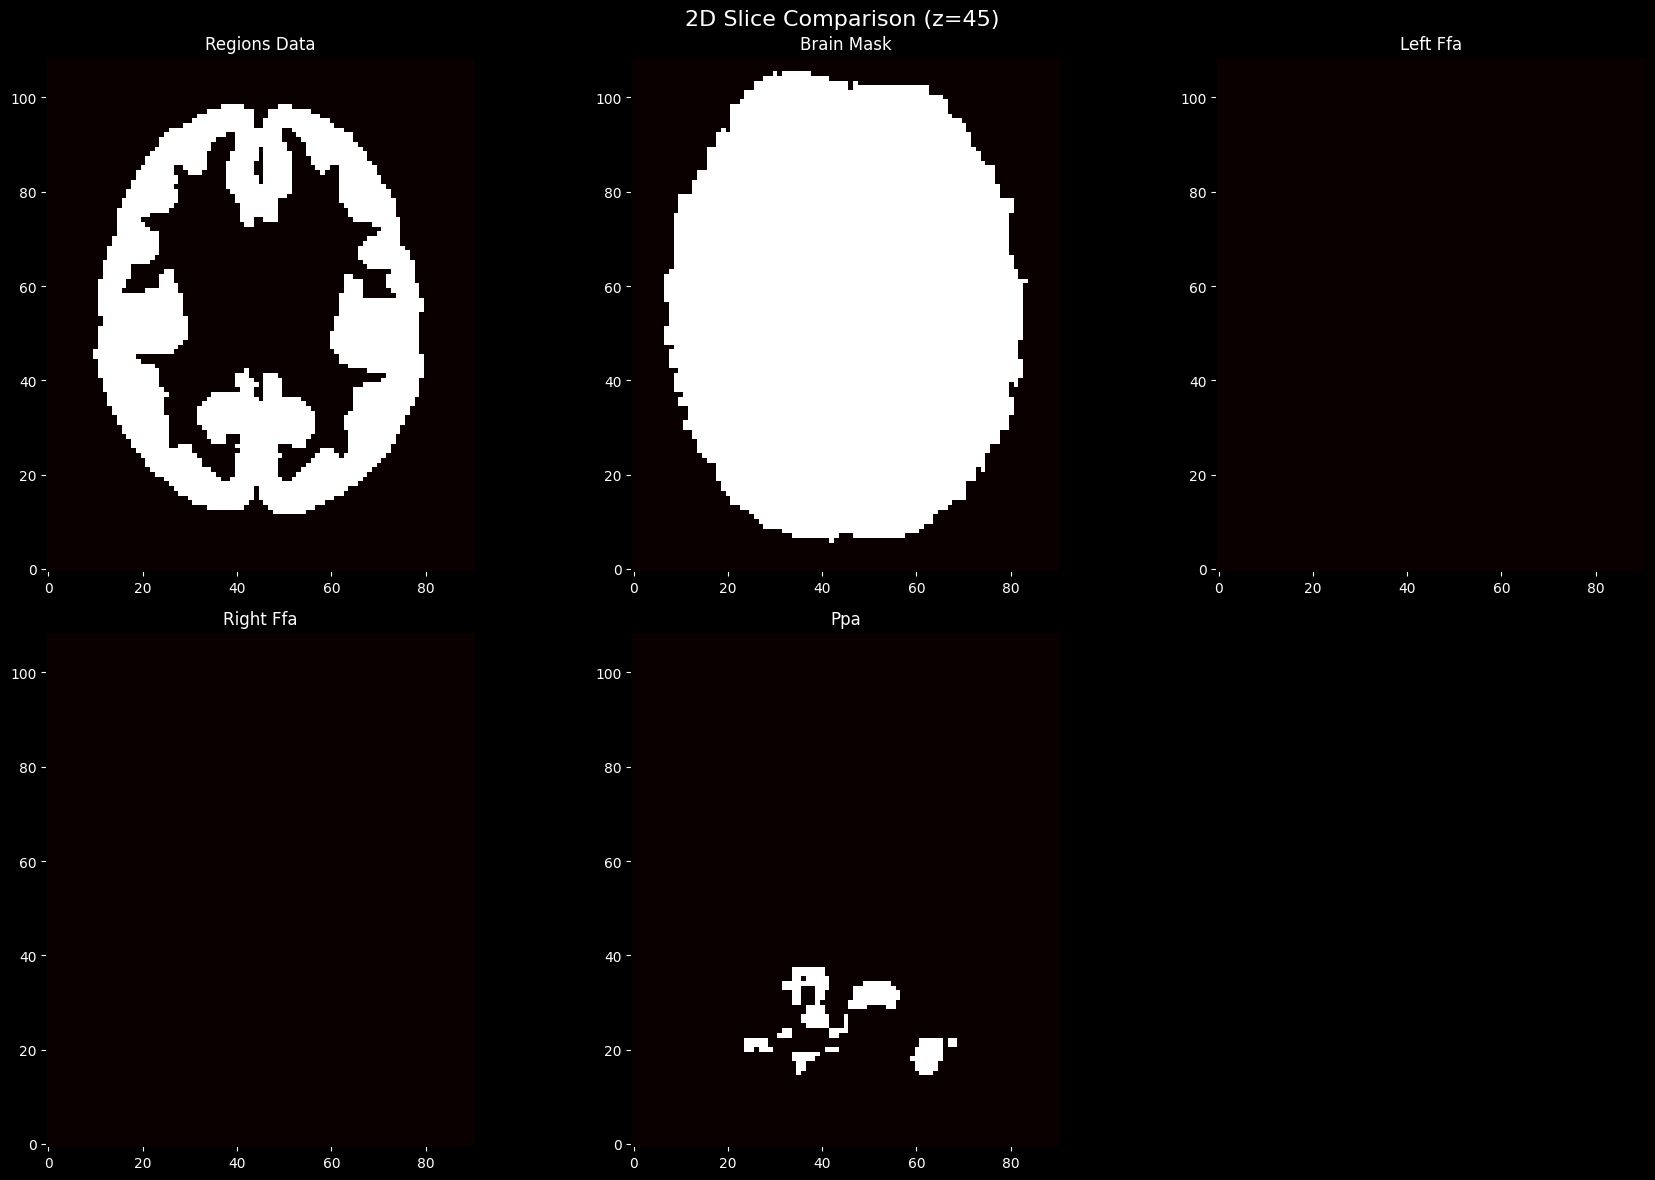


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
KEY ATLAS OVERLAP RESULTS:
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
Right FFA: 98/100 voxels (98.0%) in atlas
Left FFA: 123/123 voxels (100.0%) in atlas
PPA: 6,435/7,187 voxels (89.5%) in atlas
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯


In [21]:
import numpy as np
import nibabel as nib
from nilearn import image
import plotly.graph_objects as go
import matplotlib.pyplot as plt

def resize_roi_nilearn(roi_file, reference_file, threshold=0.5):
    """
    Resample ROI to match reference image using nilearn (spatially accurate)
    """
    # Load images
    roi_img = nib.load(roi_file)
    ref_img = nib.load(reference_file)
    
    # Resample ROI to reference space
    resampled_roi = image.resample_to_img(
        roi_img, 
        ref_img, 
        interpolation='nearest',  # Use nearest neighbor for masks
        copy=True
    )
    
    # Get data and ensure it's 3D
    roi_data = resampled_roi.get_fdata()
    if len(roi_data.shape) == 4:
        roi_data = roi_data[:, :, :, 0]  # Take first volume if 4D
    
    # Convert to boolean mask
    return (roi_data > threshold).astype(bool)

def create_comprehensive_3d_plot(brain_mask, roi_masks_dict, max_points_per_region=10000):
    """
    Create 3D plot with brain and all ROI masks using vibrant colors
    
    Parameters:
    - brain_mask: 3D brain mask
    - roi_masks_dict: dict with ROI names as keys, masks as values
    - max_points_per_region: max points to show per region for performance
    """
    
    fig = go.Figure()
    
    # Color scheme optimized for black background
    region_colors = {
        'regions_data': 'gray',      # Background regions in gray
        'Left FFA': 'lime',          # Bright green  
        'Right FFA': 'red',          # Bright red
        'PPA': 'cyan',               # Bright cyan
        'brain_mask': 'lightblue'    # Light blue for brain boundary
    }
    
    # Opacity and size settings
    region_settings = {
        'regions_data': {'opacity': 0.2, 'size': 1},     # Very transparent background
        'Left FFA': {'opacity': 0.9, 'size': 4},         # Highly visible
        'Right FFA': {'opacity': 0.9, 'size': 4},        # Highly visible  
        'PPA': {'opacity': 0.9, 'size': 4},              # Highly visible
        'brain_mask': {'opacity': 0.1, 'size': 1}        # Very faint brain outline
    }
    
    print("🎨 Creating 3D visualization...")
    
    # Process each mask
    for mask_name, mask_data in roi_masks_dict.items():
        if mask_data is None:
            print(f"⚠️  Skipping {mask_name} - no data")
            continue
            
        # Get coordinates of mask voxels
        coords = np.where(mask_data)
        
        if len(coords[0]) == 0:
            print(f"⚠️  Skipping {mask_name} - no voxels found")
            continue
        
        x_coords, y_coords, z_coords = coords
        
        # Subsample for performance if needed
        if len(x_coords) > max_points_per_region:
            indices = np.random.choice(len(x_coords), max_points_per_region, replace=False)
            x_coords = x_coords[indices]
            y_coords = y_coords[indices] 
            z_coords = z_coords[indices]
        
        # Get display properties
        color = region_colors.get(mask_name, 'white')
        settings = region_settings.get(mask_name, {'opacity': 0.7, 'size': 2})
        
        # Add trace
        fig.add_trace(go.Scatter3d(
            x=x_coords,
            y=y_coords,
            z=z_coords,
            mode='markers',
            marker=dict(
                size=settings['size'],
                color=color,
                opacity=settings['opacity']
            ),
            name=mask_name.replace('_', ' ').title(),
            hovertemplate=f'<b>{mask_name}</b><br>Coords: (%{{x}}, %{{y}}, %{{z}})<extra></extra>'
        ))
        
        print(f"✅ Added {mask_name}: {len(x_coords):,} voxels in {color}")
    
    # Update layout for beautiful visualization
    fig.update_layout(
        title=dict(
            text='3D Brain: ROI Masks and Region Atlas',
            x=0.5,
            font=dict(size=18, color='white')
        ),
        scene=dict(
            xaxis_title='X (Left → Right)',
            yaxis_title='Y (Posterior → Anterior)',
            zaxis_title='Z (Inferior → Superior)',
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
            bgcolor='black',
            xaxis=dict(
                backgroundcolor='black', 
                gridcolor='gray',
                showbackground=True,
                zerolinecolor='gray'
            ),
            yaxis=dict(
                backgroundcolor='black', 
                gridcolor='gray',
                showbackground=True,
                zerolinecolor='gray'
            ),
            zaxis=dict(
                backgroundcolor='black', 
                gridcolor='gray',
                showbackground=True,
                zerolinecolor='gray'
            )
        ),
        width=1200,
        height=900,
        paper_bgcolor='black',
        plot_bgcolor='black',
        font=dict(color='white'),
        showlegend=True,
        legend=dict(
            x=0.02,
            y=0.98,
            bgcolor='rgba(0,0,0,0.8)',
            bordercolor='white',
            borderwidth=1,
            font=dict(color='white')
        )
    )
    
    return fig

def analyze_atlas_overlap(roi_masks, atlas_mask, atlas_name="Atlas Regions"):
    """
    Detailed analysis of ROI overlap with atlas mask
    
    Parameters:
    - roi_masks: dict of ROI masks
    - atlas_mask: 3D boolean atlas mask  
    - atlas_name: name for the atlas
    """
    
    print(f"\n" + "="*70)
    print(f"🎯 DETAILED ATLAS OVERLAP ANALYSIS")
    print(f"Atlas: {atlas_name}")
    print("="*70)
    
    atlas_voxels = np.sum(atlas_mask)
    print(f"Total atlas voxels: {atlas_voxels:,}")
    
    roi_names = ['Right FFA', 'Left FFA', 'PPA']
    overlap_results = {}
    
    for roi_name in roi_names:
        if roi_name in roi_masks and roi_masks[roi_name] is not None:
            roi_mask = roi_masks[roi_name]
            roi_voxels = np.sum(roi_mask)
            
            # Calculate overlap
            overlap_voxels = np.sum(roi_mask & atlas_mask)
            
            # Calculate percentages
            roi_in_atlas_pct = (overlap_voxels / roi_voxels * 100) if roi_voxels > 0 else 0
            atlas_covered_by_roi_pct = (overlap_voxels / atlas_voxels * 100) if atlas_voxels > 0 else 0
            
            # Store results
            overlap_results[roi_name] = {
                'roi_voxels': roi_voxels,
                'overlap_voxels': overlap_voxels,
                'roi_in_atlas_pct': roi_in_atlas_pct,
                'atlas_covered_pct': atlas_covered_by_roi_pct
            }
            
            print(f"\n🔍 {roi_name}:")
            print(f"   ROI size: {roi_voxels:,} voxels")
            print(f"   Overlap: {overlap_voxels:,} voxels")
            print(f"   {roi_in_atlas_pct:.1f}% of {roi_name} is within atlas")
            print(f"   {roi_name} covers {atlas_covered_by_roi_pct:.3f}% of atlas")
            
            # Overlap quality assessment
            if roi_in_atlas_pct >= 90:
                quality = "🟢 Excellent"
            elif roi_in_atlas_pct >= 70:
                quality = "🟡 Good" 
            elif roi_in_atlas_pct >= 50:
                quality = "🟠 Moderate"
            else:
                quality = "🔴 Poor"
            
            print(f"   Overlap quality: {quality}")
    
    # Summary statistics
    total_roi_voxels = sum([r['roi_voxels'] for r in overlap_results.values()])
    total_overlap_voxels = sum([r['overlap_voxels'] for r in overlap_results.values()])
    
    print(f"\n📊 SUMMARY:")
    print(f"   Total ROI voxels: {total_roi_voxels:,}")
    print(f"   Total overlap: {total_overlap_voxels:,}")
    print(f"   Combined ROI coverage of atlas: {total_overlap_voxels/atlas_voxels*100:.3f}%")
    print(f"   Average ROI-atlas overlap: {total_overlap_voxels/total_roi_voxels*100:.1f}%")
    
    # Check for ROI overlaps with each other
    print(f"\n🔗 ROI-TO-ROI OVERLAPS:")
    roi_list = [(name, mask) for name, mask in roi_masks.items() 
                if name in roi_names and mask is not None]
    
    for i, (name1, mask1) in enumerate(roi_list):
        for name2, mask2 in roi_list[i+1:]:
            roi_overlap = np.sum(mask1 & mask2)
            if roi_overlap > 0:
                print(f"   {name1} ∩ {name2}: {roi_overlap:,} voxels")
            else:
                print(f"   {name1} ∩ {name2}: No overlap ✓")
    
    return overlap_results

# Main execution
print("🧠 COMPREHENSIVE ROI 3D VISUALIZATION")
print("="*60)

# File paths
fmri_file = "/newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-1/func/sub-S01_ses-1_task-FirstBite_space-MNI_desc-ppres_bold.nii.gz"

# 1. Resample ROI masks using nilearn method
print("\n1. Resampling ROI masks using nilearn...")

roi_files = {
    'Left FFA': 'LFFA_roi.nii.gz',
    'Right FFA': 'RFFA_roi.nii.gz', 
    'PPA': 'ppa_prob.nii'
}

resampled_rois = {}
for roi_name, roi_path in roi_files.items():
    try:
        mask = resize_roi_nilearn(roi_path, fmri_file, threshold=0.1)
        resampled_rois[roi_name] = mask
        print(f"✅ {roi_name}: {np.sum(mask):,} voxels, shape {mask.shape}")
    except Exception as e:
        print(f"❌ {roi_name}: Error - {e}")
        resampled_rois[roi_name] = None

# 2. Load your regions_data
print("\n2. Loading regions_data...")
try:
    regions_data = np.load('region_ids_all2.npy').reshape(91, 109, 91)
    # Convert to binary mask (any non-zero value)
    regions_mask = regions_data > 0
    print(f"✅ Regions data: {np.sum(regions_mask):,} voxels, shape {regions_data.shape}")
except Exception as e:
    print(f"❌ Error loading regions_data: {e}")
    regions_data = None
    regions_mask = None

# 3. Add brain mask (assuming you have it from earlier)
# If not available, create from fMRI
try:
    brain_mask = brain_mask  # From previous code
    print(f"✅ Brain mask: {np.sum(brain_mask):,} voxels")
except:
    print("⚠️  Creating brain mask from fMRI...")
    brain_mask = fmri_array_mean != 0
    print(f"✅ Brain mask created: {np.sum(brain_mask):,} voxels")

# 4. Combine all masks
all_masks = {
    'regions_data': regions_mask,
    'brain_mask': brain_mask,
    **resampled_rois
}

# 5. Calculate basic statistics
print(f"\n📊 BASIC MASK STATISTICS")
print("="*50)
for name, mask in all_masks.items():
    if mask is not None:
        voxel_count = np.sum(mask)
        print(f"{name.ljust(15)}: {voxel_count:,} voxels, shape {mask.shape}")

# 6. Detailed atlas overlap analysis
overlap_results = None
if regions_mask is not None:
    overlap_results = analyze_atlas_overlap(resampled_rois, regions_mask, "Region IDs Atlas")
else:
    print("⚠️  No atlas mask available for overlap analysis")

# 7. Create 3D visualization
print(f"\n7. Creating comprehensive 3D visualization...")
fig = create_comprehensive_3d_plot(brain_mask, all_masks, max_points_per_region=12000)

print(f"\n🎯 3D Visualization Ready!")
print(f"Color scheme:")
print(f"  🔴 Right FFA: Red")
print(f"  🟢 Left FFA: Lime Green") 
print(f"  🔵 PPA: Cyan")
print(f"  ⚪ Atlas Regions: Gray (transparent)")
print(f"  💙 Brain Outline: Light Blue (very faint)")

# Display the plot
fig.show()

print(f"\n✨ Interactive Features:")
print(f"  • Rotate and zoom with mouse")
print(f"  • Click legend items to show/hide regions")
print(f"  • Hover over points for coordinates")
print(f"  • Double-click legend to isolate single region")

print(f"\n🔧 Customization Tips:")
print(f"  • Adjust max_points_per_region for performance vs. detail")
print(f"  • Modify colors in region_colors dict")
print(f"  • Change opacity in region_settings dict")
print(f"  • Toggle regions on/off using the legend")

# 8. Create 2D slice comparison
def create_slice_comparison(all_masks, slice_idx=None):
    """Create 2D slice view of all masks for comparison"""
    if slice_idx is None:
        slice_idx = 45  # Middle slice
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12), facecolor='black')
    axes = axes.flatten()
    
    colors = ['gray', 'lightblue', 'lime', 'red', 'cyan']
    
    for i, (name, mask) in enumerate(all_masks.items()):
        if mask is not None and i < len(axes):
            axes[i].imshow(mask[:, :, slice_idx].T, cmap='hot', origin='lower')
            axes[i].set_title(name.replace('_', ' ').title(), color='white')
            axes[i].set_facecolor('black')
            axes[i].tick_params(colors='white')
    
    # Hide unused subplots
    for j in range(len(all_masks), len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle(f'2D Slice Comparison (z={slice_idx})', color='white', fontsize=16)
    plt.tight_layout()
    plt.show()

print(f"\n8. Creating 2D slice comparison...")
create_slice_comparison(all_masks)

# Print key overlap results for easy reference
if overlap_results is not None:
    print(f"\n" + "🎯"*30)
    print(f"KEY ATLAS OVERLAP RESULTS:")
    print(f"🎯"*30)
    for roi_name, results in overlap_results.items():
        print(f"{roi_name}: {results['overlap_voxels']:,}/{results['roi_voxels']:,} voxels ({results['roi_in_atlas_pct']:.1f}%) in atlas")
    print(f"🎯"*30)

In [12]:
import numpy as np
import nibabel as nib
from nilearn import image
import plotly.graph_objects as go
import matplotlib.pyplot as plt

def resize_roi_nilearn(roi_file, reference_file, threshold=0.5):
    """
    Resample ROI to match reference image using nilearn (spatially accurate)
    """
    # Load images
    roi_img = nib.load(roi_file)
    ref_img = nib.load(reference_file)
    
    # Resample ROI to reference space
    resampled_roi = image.resample_to_img(
        roi_img, 
        ref_img, 
        interpolation='nearest',  # Use nearest neighbor for masks
        copy=True
    )
    
    # Get data and ensure it's 3D
    roi_data = resampled_roi.get_fdata()
    if len(roi_data.shape) == 4:
        roi_data = roi_data[:, :, :, 0]  # Take first volume if 4D
    
    # Convert to boolean mask
    return (roi_data > threshold).astype(bool)

def create_comprehensive_3d_plot(brain_mask, roi_masks_dict, max_points_per_region=10000):
    """
    Create 3D plot with brain and all ROI masks using vibrant colors
    
    Parameters:
    - brain_mask: 3D brain mask
    - roi_masks_dict: dict with ROI names as keys, masks as values
    - max_points_per_region: max points to show per region for performance
    """
    
    fig = go.Figure()
    
    # Color scheme optimized for black background
    region_colors = {
        'Schaefer1000_4609': 'lightgray',   # Light gray for first atlas
        'Schaefer1000_15364': 'darkgray',   # Darker gray for second atlas
        'Left FFA': 'lime',                 # Bright green  
        'Right FFA': 'red',                 # Bright red
        'PPA': 'cyan',                      # Bright cyan
    }
    
    # Opacity and size settings
    region_settings = {
        'Schaefer1000_4609': {'opacity': 0.15, 'size': 1},    # Very transparent background
        'Schaefer1000_15364': {'opacity': 0.2, 'size': 1},    # Slightly more visible
        'Left FFA': {'opacity': 0.9, 'size': 4},              # Highly visible
        'Right FFA': {'opacity': 0.9, 'size': 4},             # Highly visible  
        'PPA': {'opacity': 0.9, 'size': 4},                   # Highly visible
    }
    
    print("🎨 Creating 3D visualization...")
    
    # Process each mask
    for mask_name, mask_data in roi_masks_dict.items():
        if mask_data is None:
            print(f"⚠️  Skipping {mask_name} - no data")
            continue
            
        # Get coordinates of mask voxels
        coords = np.where(mask_data)
        
        if len(coords[0]) == 0:
            print(f"⚠️  Skipping {mask_name} - no voxels found")
            continue
        
        x_coords, y_coords, z_coords = coords
        
        # Subsample for performance if needed
        if len(x_coords) > max_points_per_region:
            indices = np.random.choice(len(x_coords), max_points_per_region, replace=False)
            x_coords = x_coords[indices]
            y_coords = y_coords[indices] 
            z_coords = z_coords[indices]
        
        # Get display properties
        color = region_colors.get(mask_name, 'white')
        settings = region_settings.get(mask_name, {'opacity': 0.7, 'size': 2})
        
        # Add trace
        fig.add_trace(go.Scatter3d(
            x=x_coords,
            y=y_coords,
            z=z_coords,
            mode='markers',
            marker=dict(
                size=settings['size'],
                color=color,
                opacity=settings['opacity']
            ),
            name=mask_name.replace('_', ' ').title(),
            hovertemplate=f'<b>{mask_name}</b><br>Coords: (%{{x}}, %{{y}}, %{{z}})<extra></extra>'
        ))
        
        print(f"✅ Added {mask_name}: {len(x_coords):,} voxels in {color}")
    
    # Update layout for beautiful visualization
    fig.update_layout(
        title=dict(
            text='3D Brain: ROI Masks and Schaefer Atlases',
            x=0.5,
            font=dict(size=18, color='white')
        ),
        scene=dict(
            xaxis_title='X (Left → Right)',
            yaxis_title='Y (Posterior → Anterior)',
            zaxis_title='Z (Inferior → Superior)',
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
            bgcolor='black',
            xaxis=dict(
                backgroundcolor='black', 
                gridcolor='gray',
                showbackground=True,
                zerolinecolor='gray'
            ),
            yaxis=dict(
                backgroundcolor='black', 
                gridcolor='gray',
                showbackground=True,
                zerolinecolor='gray'
            ),
            zaxis=dict(
                backgroundcolor='black', 
                gridcolor='gray',
                showbackground=True,
                zerolinecolor='gray'
            )
        ),
        width=1200,
        height=900,
        paper_bgcolor='black',
        plot_bgcolor='black',
        font=dict(color='white'),
        showlegend=True,
        legend=dict(
            x=0.02,
            y=0.98,
            bgcolor='rgba(0,0,0,0.8)',
            bordercolor='white',
            borderwidth=1,
            font=dict(color='white')
        )
    )
    
    return fig

def analyze_atlas_overlap(roi_masks, atlas_mask, atlas_name="Atlas Regions"):
    """
    Detailed analysis of ROI overlap with atlas mask
    
    Parameters:
    - roi_masks: dict of ROI masks
    - atlas_mask: 3D boolean atlas mask  
    - atlas_name: name for the atlas
    """
    
    print(f"\n" + "="*70)
    print(f"🎯 DETAILED ATLAS OVERLAP ANALYSIS")
    print(f"Atlas: {atlas_name}")
    print("="*70)
    
    atlas_voxels = np.sum(atlas_mask)
    print(f"Total atlas voxels: {atlas_voxels:,}")
    
    roi_names = ['Right FFA', 'Left FFA', 'PPA']
    overlap_results = {}
    
    for roi_name in roi_names:
        if roi_name in roi_masks and roi_masks[roi_name] is not None:
            roi_mask = roi_masks[roi_name]
            roi_voxels = np.sum(roi_mask)
            
            # Calculate overlap
            overlap_voxels = np.sum(roi_mask & atlas_mask)
            
            # Calculate percentages
            roi_in_atlas_pct = (overlap_voxels / roi_voxels * 100) if roi_voxels > 0 else 0
            atlas_covered_by_roi_pct = (overlap_voxels / atlas_voxels * 100) if atlas_voxels > 0 else 0
            
            # Store results
            overlap_results[roi_name] = {
                'roi_voxels': roi_voxels,
                'overlap_voxels': overlap_voxels,
                'roi_in_atlas_pct': roi_in_atlas_pct,
                'atlas_covered_pct': atlas_covered_by_roi_pct
            }
            
            print(f"\n🔍 {roi_name}:")
            print(f"   ROI size: {roi_voxels:,} voxels")
            print(f"   Overlap: {overlap_voxels:,} voxels")
            print(f"   {roi_in_atlas_pct:.1f}% of {roi_name} is within atlas")
            print(f"   {roi_name} covers {atlas_covered_by_roi_pct:.3f}% of atlas")
            
            # Overlap quality assessment
            if roi_in_atlas_pct >= 90:
                quality = "🟢 Excellent"
            elif roi_in_atlas_pct >= 70:
                quality = "🟡 Good" 
            elif roi_in_atlas_pct >= 50:
                quality = "🟠 Moderate"
            else:
                quality = "🔴 Poor"
            
            print(f"   Overlap quality: {quality}")
    
    # Summary statistics
    total_roi_voxels = sum([r['roi_voxels'] for r in overlap_results.values()])
    total_overlap_voxels = sum([r['overlap_voxels'] for r in overlap_results.values()])
    
    print(f"\n📊 SUMMARY:")
    print(f"   Total ROI voxels: {total_roi_voxels:,}")
    print(f"   Total overlap: {total_overlap_voxels:,}")
    print(f"   Combined ROI coverage of atlas: {total_overlap_voxels/atlas_voxels*100:.3f}%")
    print(f"   Average ROI-atlas overlap: {total_overlap_voxels/total_roi_voxels*100:.1f}%")
    
    # Check for ROI overlaps with each other
    print(f"\n🔗 ROI-TO-ROI OVERLAPS:")
    roi_list = [(name, mask) for name, mask in roi_masks.items() 
                if name in roi_names and mask is not None]
    
    for i, (name1, mask1) in enumerate(roi_list):
        for name2, mask2 in roi_list[i+1:]:
            roi_overlap = np.sum(mask1 & mask2)
            if roi_overlap > 0:
                print(f"   {name1} ∩ {name2}: {roi_overlap:,} voxels")
            else:
                print(f"   {name1} ∩ {name2}: No overlap ✓")
    
    return overlap_results

# Main execution
print("🧠 ROI VISUALIZATION WITH SCHAEFER ATLASES")
print("="*60)

# File paths
fmri_file = "/newhome2024/chchan/ds004892-1.0.1/derivatives/preprocessing/sub-S01/ses-1/func/sub-S01_ses-1_task-FirstBite_space-MNI_desc-ppres_bold.nii.gz"

# 1. Resample ROI masks using nilearn method
print("\n1. Resampling ROI masks using nilearn...")

roi_files = {
    'Left FFA': 'LFFA_roi.nii.gz',
    'Right FFA': 'RFFA_roi.nii.gz', 
    'PPA': 'ppa_prob.nii'
}

resampled_rois = {}
for roi_name, roi_path in roi_files.items():
    try:
        mask = resize_roi_nilearn(roi_path, fmri_file, threshold=0.1)
        resampled_rois[roi_name] = mask
        print(f"✅ {roi_name}: {np.sum(mask):,} voxels, shape {mask.shape}")
    except Exception as e:
        print(f"❌ {roi_name}: Error - {e}")
        resampled_rois[roi_name] = None

# Save the resampled masks as .npy files
print(f"\n💾 Saving resampled masks...")
save_mapping = {
    'Right FFA': 'resampled_rffa.npy',
    'Left FFA': 'resampled_lffa.npy',
    'PPA': 'resampled_ppa.npy'
}

for roi_name, filename in save_mapping.items():
    if roi_name in resampled_rois and resampled_rois[roi_name] is not None:
        try:
            np.save(filename, resampled_rois[roi_name])
            print(f"✅ Saved {roi_name} as {filename}")
        except Exception as e:
            print(f"❌ Error saving {roi_name}: {e}")
    else:
        print(f"⚠️  Cannot save {roi_name} - mask not available")

# 2. Load your Schaefer atlas masks
print("\n2. Loading Schaefer atlas masks...")
schaefer_masks = {}

schaefer_files = {
    'Schaefer1000_4609': 'mask_schaefer1000_4609.npy',
    'Schaefer1000_15364': 'mask_schaefer1000_15364.npy'
}

for atlas_name, atlas_file in schaefer_files.items():
    try:
        atlas_data = np.load(atlas_file)
        
        # Ensure correct shape
        if atlas_data.shape != (91, 109, 91):
            print(f"⚠️  {atlas_name}: Reshaping from {atlas_data.shape} to (91, 109, 91)")
            atlas_data = atlas_data.reshape(91, 109, 91)
        
        # Convert to binary mask (any non-zero value)
        atlas_mask = atlas_data > 0
        schaefer_masks[atlas_name] = atlas_mask
        print(f"✅ {atlas_name}: {np.sum(atlas_mask):,} voxels, shape {atlas_data.shape}")
        
    except Exception as e:
        print(f"❌ Error loading {atlas_name}: {e}")
        schaefer_masks[atlas_name] = None

# 3. Create brain mask from fMRI (for reference only, won't be plotted)
print("\n3. Creating brain mask for overlap calculations...")
try:
    brain_mask = brain_mask  # From previous code
    print(f"✅ Using existing brain mask: {np.sum(brain_mask):,} voxels")
except:
    print("⚠️  Creating brain mask from fMRI...")
    brain_mask = fmri_array_mean != 0
    print(f"✅ Brain mask created: {np.sum(brain_mask):,} voxels")

# 4. Combine masks for visualization (excluding brain_mask and mean brain)
all_masks = {
    **schaefer_masks,  # Add both Schaefer atlases
    **resampled_rois   # Add LFFA, RFFA, PPA
}

# 5. Calculate basic statistics
print(f"\n📊 BASIC MASK STATISTICS")
print("="*50)
for name, mask in all_masks.items():
    if mask is not None:
        voxel_count = np.sum(mask)
        print(f"{name.ljust(20)}: {voxel_count:,} voxels, shape {mask.shape}")

# 6. Detailed atlas overlap analysis for both Schaefer atlases
overlap_results_all = {}

for atlas_name, atlas_mask in schaefer_masks.items():
    if atlas_mask is not None:
        print(f"\n{'='*20} {atlas_name} {'='*20}")
        overlap_results = analyze_atlas_overlap(resampled_rois, atlas_mask, atlas_name)
        overlap_results_all[atlas_name] = overlap_results
    else:
        print(f"⚠️  Skipping {atlas_name} - not loaded")

# 7. Create 3D visualization
print(f"\n7. Creating comprehensive 3D visualization...")
fig = create_comprehensive_3d_plot(brain_mask, all_masks, max_points_per_region=12000)

print(f"\n🎯 3D Visualization Ready!")
print(f"Color scheme:")
print(f"  🔴 Right FFA: Red")
print(f"  🟢 Left FFA: Lime Green") 
print(f"  🔵 PPA: Cyan")
print(f"  ⚪ Schaefer1000_4609: Light Gray (transparent)")
print(f"  ⚫ Schaefer1000_15364: Dark Gray (transparent)")

# Display the plot
fig.show()

print(f"\n✨ Interactive Features:")
print(f"  • Rotate and zoom with mouse")
print(f"  • Click legend items to show/hide regions")
print(f"  • Hover over points for coordinates")
print(f"  • Double-click legend to isolate single region")

print(f"\n🔧 Customization Tips:")
print(f"  • Adjust max_points_per_region for performance vs. detail")
print(f"  • Modify colors in region_colors dict")
print(f"  • Change opacity in region_settings dict")
print(f"  • Toggle atlases/ROIs on/off using the legend")
print(f"  • Compare ROI overlap between different Schaefer resolutions")

# 8. Create 2D slice comparison
def create_slice_comparison(all_masks, slice_idx=None):
    """Create 2D slice view of all masks for comparison"""
    if slice_idx is None:
        slice_idx = 45  # Middle slice
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12), facecolor='black')
    axes = axes.flatten()
    
    colors = ['gray', 'lightblue', 'lime', 'red', 'cyan']
    
    for i, (name, mask) in enumerate(all_masks.items()):
        if mask is not None and i < len(axes):
            axes[i].imshow(mask[:, :, slice_idx].T, cmap='hot', origin='lower')
            axes[i].set_title(name.replace('_', ' ').title(), color='white')
            axes[i].set_facecolor('black')
            axes[i].tick_params(colors='white')
    
    # Hide unused subplots
    for j in range(len(all_masks), len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle(f'2D Slice Comparison (z={slice_idx})', color='white', fontsize=16)
    plt.tight_layout()
    plt.show()

print(f"\n8. Creating 2D slice comparison...")
create_slice_comparison(all_masks)

# Print key overlap results for easy reference
if overlap_results_all:
    print(f"\n" + "🎯"*50)
    print(f"KEY ATLAS OVERLAP RESULTS SUMMARY:")
    print(f"🎯"*50)
    
    for atlas_name, overlap_results in overlap_results_all.items():
        print(f"\n📊 {atlas_name}:")
        for roi_name, results in overlap_results.items():
            print(f"   {roi_name}: {results['overlap_voxels']:,}/{results['roi_voxels']:,} voxels ({results['roi_in_atlas_pct']:.1f}%) in atlas")
    
    print(f"\n" + "🎯"*50)
    
    # Compare between atlases
    print(f"\n🔄 ATLAS COMPARISON:")
    roi_names = ['Right FFA', 'Left FFA', 'PPA']
    
    for roi_name in roi_names:
        if all(roi_name in overlap_results_all[atlas] for atlas in overlap_results_all.keys()):
            print(f"\n{roi_name}:")
            for atlas_name in overlap_results_all.keys():
                results = overlap_results_all[atlas_name][roi_name]
                print(f"   {atlas_name}: {results['roi_in_atlas_pct']:.1f}% overlap")
    
    print(f"🎯"*50)

🧠 ROI VISUALIZATION WITH SCHAEFER ATLASES

1. Resampling ROI masks using nilearn...


KeyboardInterrupt: 

In [3]:
import numpy as np
import nibabel as nib
import os

def load_mask(filepath):
    """Load mask from either .npy or .nii.gz format"""
    if filepath.endswith('.npy'):
        return np.load(filepath)
    elif filepath.endswith('.nii.gz') or filepath.endswith('.nii'):
        img = nib.load(filepath)
        return img.get_fdata().astype(bool)  # Convert to boolean mask
    else:
        raise ValueError("Unsupported file format. Use .npy or .nii.gz")

def reflect_mask_lr(mask):
    """Reflect mask across left-right axis (sagittal plane)"""
    # Assuming standard neuroimaging orientation where first dimension is left-right
    return np.flip(mask, axis=0)

def create_enhanced_masks(lffa_path, rffa_path, output_dir="."):
    """
    Create enhanced FFA masks by combining original regions with their reflections
    
    Parameters:
    lffa_path: Path to left FFA mask
    rffa_path: Path to right FFA mask  
    output_dir: Directory to save output files
    """
    
    # Load original masks
    print("Loading original masks...")
    lffa_original = load_mask(lffa_path)
    rffa_original = load_mask(rffa_path)
    
    print(f"LFFA original shape: {lffa_original.shape}")
    print(f"RFFA original shape: {rffa_original.shape}")
    
    # Check that masks have the same shape
    if lffa_original.shape != rffa_original.shape:
        raise ValueError("LFFA and RFFA masks must have the same dimensions")
    
    # Create reflections
    print("Creating reflected masks...")
    lffa_reflected = reflect_mask_lr(lffa_original)  # Reflect LFFA to right side
    rffa_reflected = reflect_mask_lr(rffa_original)  # Reflect RFFA to left side
    
    # Create enhanced masks
    print("Combining original + reflected masks...")
    # New RFFA = original RFFA + reflected LFFA
    enhanced_rffa = rffa_original | lffa_reflected
    
    # New LFFA = original LFFA + reflected RFFA  
    enhanced_lffa = lffa_original | rffa_reflected
    
    # Create union of both enhanced masks
    print("Creating union mask...")
    union_mask = enhanced_lffa | enhanced_rffa
    
    # Save all masks
    output_files = {
        'enhanced_LFFA.npy': enhanced_lffa,
        'enhanced_RFFA.npy': enhanced_rffa, 
        'union_FFA.npy': union_mask
    }
    
    print("Saving enhanced masks...")
    for filename, mask in output_files.items():
        output_path = os.path.join(output_dir, filename)
        np.save(output_path, mask)
        print(f"Saved: {output_path}")
        print(f"  Shape: {mask.shape}")
        print(f"  Non-zero voxels: {np.sum(mask)}")
    
    return enhanced_lffa, enhanced_rffa, union_mask

def visualize_mask_stats(original_lffa, original_rffa, enhanced_lffa, enhanced_rffa, union_mask):
    """Print statistics about the masks"""
    print("\n=== MASK STATISTICS ===")
    print(f"Original LFFA voxels: {np.sum(original_lffa)}")
    print(f"Original RFFA voxels: {np.sum(original_rffa)}")
    print(f"Enhanced LFFA voxels: {np.sum(enhanced_lffa)}")
    print(f"Enhanced RFFA voxels: {np.sum(enhanced_rffa)}")
    print(f"Union mask voxels: {np.sum(union_mask)}")
    print(f"Overlap between enhanced masks: {np.sum(enhanced_lffa & enhanced_rffa)}")

# Main execution
if __name__ == "__main__":
    # Define paths to your mask files
    lffa_path = "LFFA_roi.nii.gz"  # or "LFFA_roi.npy" if you have numpy format
    rffa_path = "RFFA_roi.nii.gz"  # or "RFFA_roi.npy" if you have numpy format
    
    # Check if files exist
    if not os.path.exists(lffa_path):
        print(f"Warning: {lffa_path} not found. Please check the file path.")
    if not os.path.exists(rffa_path):
        print(f"Warning: {rffa_path} not found. Please check the file path.")
    
    try:
        # Create enhanced masks
        enhanced_lffa, enhanced_rffa, union_mask = create_enhanced_masks(
            lffa_path, rffa_path, output_dir="."
        )
        
        # Load original masks for comparison
        original_lffa = load_mask(lffa_path)
        original_rffa = load_mask(rffa_path)
        
        # Show statistics
        visualize_mask_stats(original_lffa, original_rffa, enhanced_lffa, enhanced_rffa, union_mask)
        
        print("\n✅ Successfully created enhanced FFA masks!")
        
    except Exception as e:
        print(f"❌ Error: {e}")
        print("Please check your file paths and formats.")

Loading original masks...
LFFA original shape: (79, 95, 84)
RFFA original shape: (79, 95, 84)
Creating reflected masks...
Combining original + reflected masks...
Creating union mask...
Saving enhanced masks...
Saved: ./enhanced_LFFA.npy
  Shape: (79, 95, 84)
  Non-zero voxels: 167
Saved: ./enhanced_RFFA.npy
  Shape: (79, 95, 84)
  Non-zero voxels: 167
Saved: ./union_FFA.npy
  Shape: (79, 95, 84)
  Non-zero voxels: 334

=== MASK STATISTICS ===
Original LFFA voxels: 123
Original RFFA voxels: 100
Enhanced LFFA voxels: 167
Enhanced RFFA voxels: 167
Union mask voxels: 334
Overlap between enhanced masks: 0

✅ Successfully created enhanced FFA masks!


🧠 3D Brain Mask Visualization
Loading masks...
Enhanced LFFA: 167 active voxels, shape (79, 95, 84)
Enhanced RFFA: 167 active voxels, shape (79, 95, 84)
Union FFA: 334 active voxels, shape (79, 95, 84)

Creating individual 3D scatter plots...


<Figure size 1000x800 with 0 Axes>

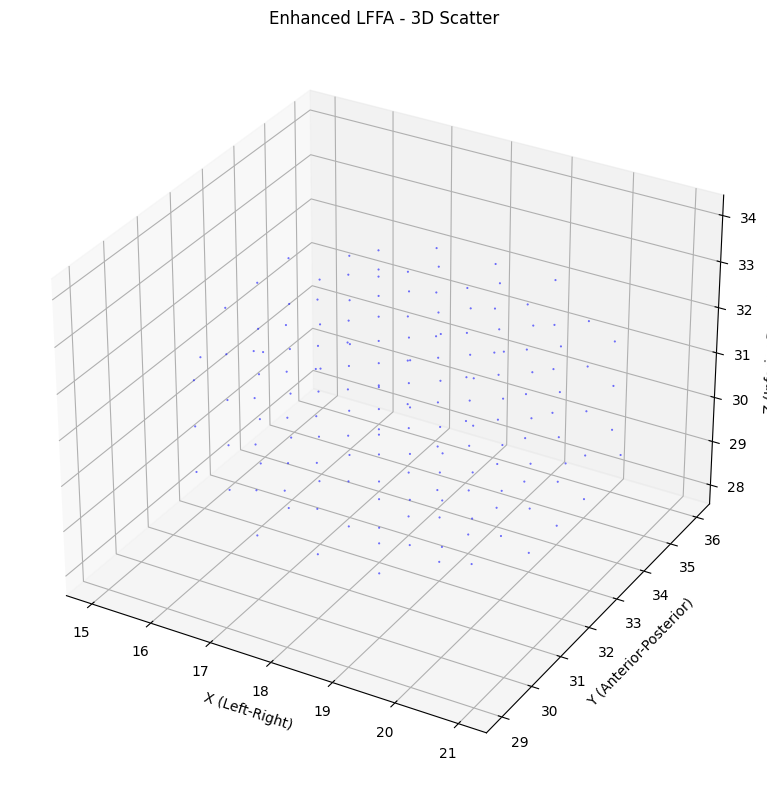

<Figure size 1000x800 with 0 Axes>

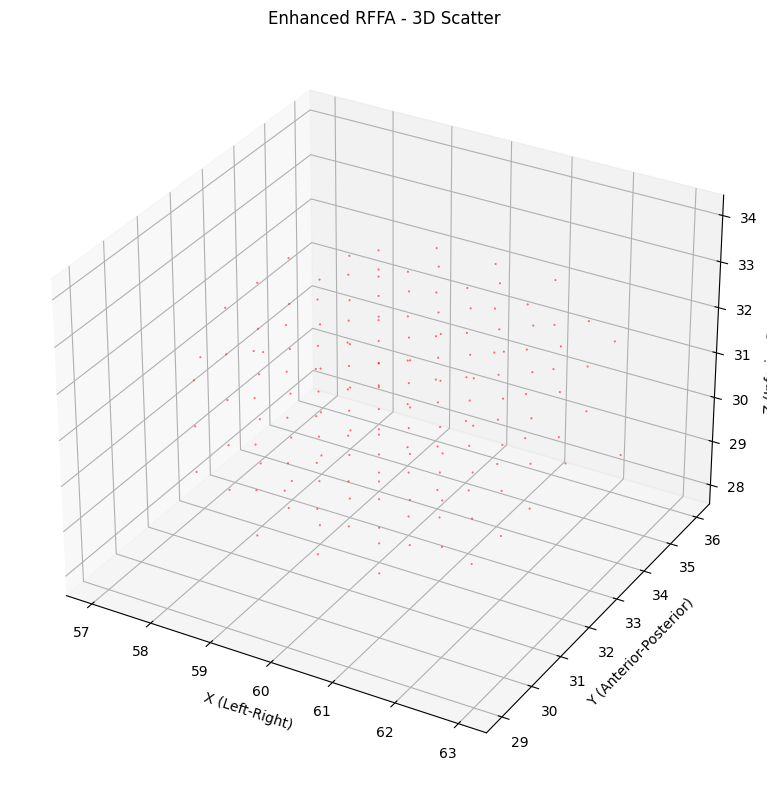

<Figure size 1000x800 with 0 Axes>

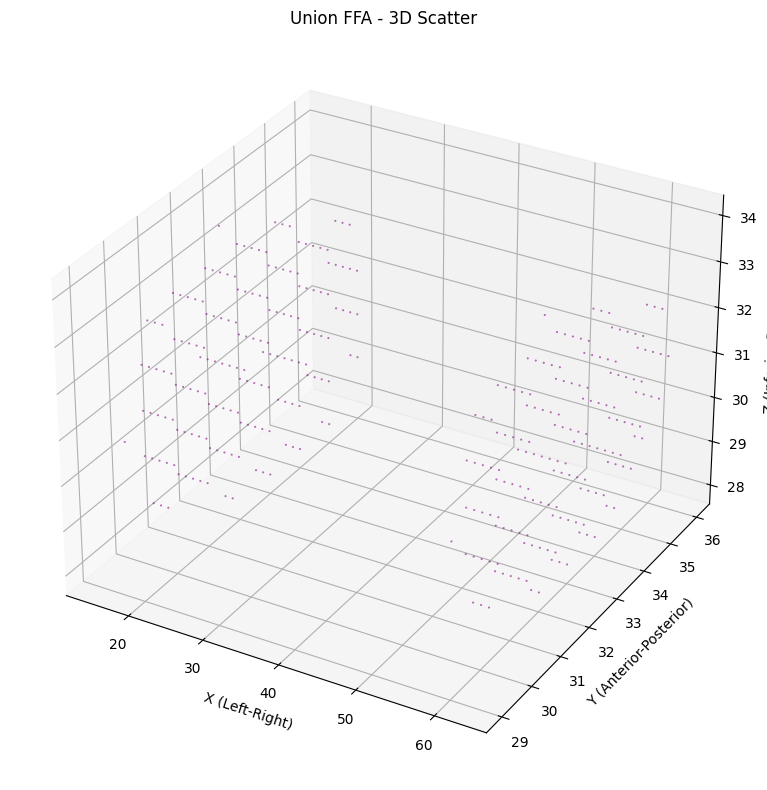


Creating combined view...


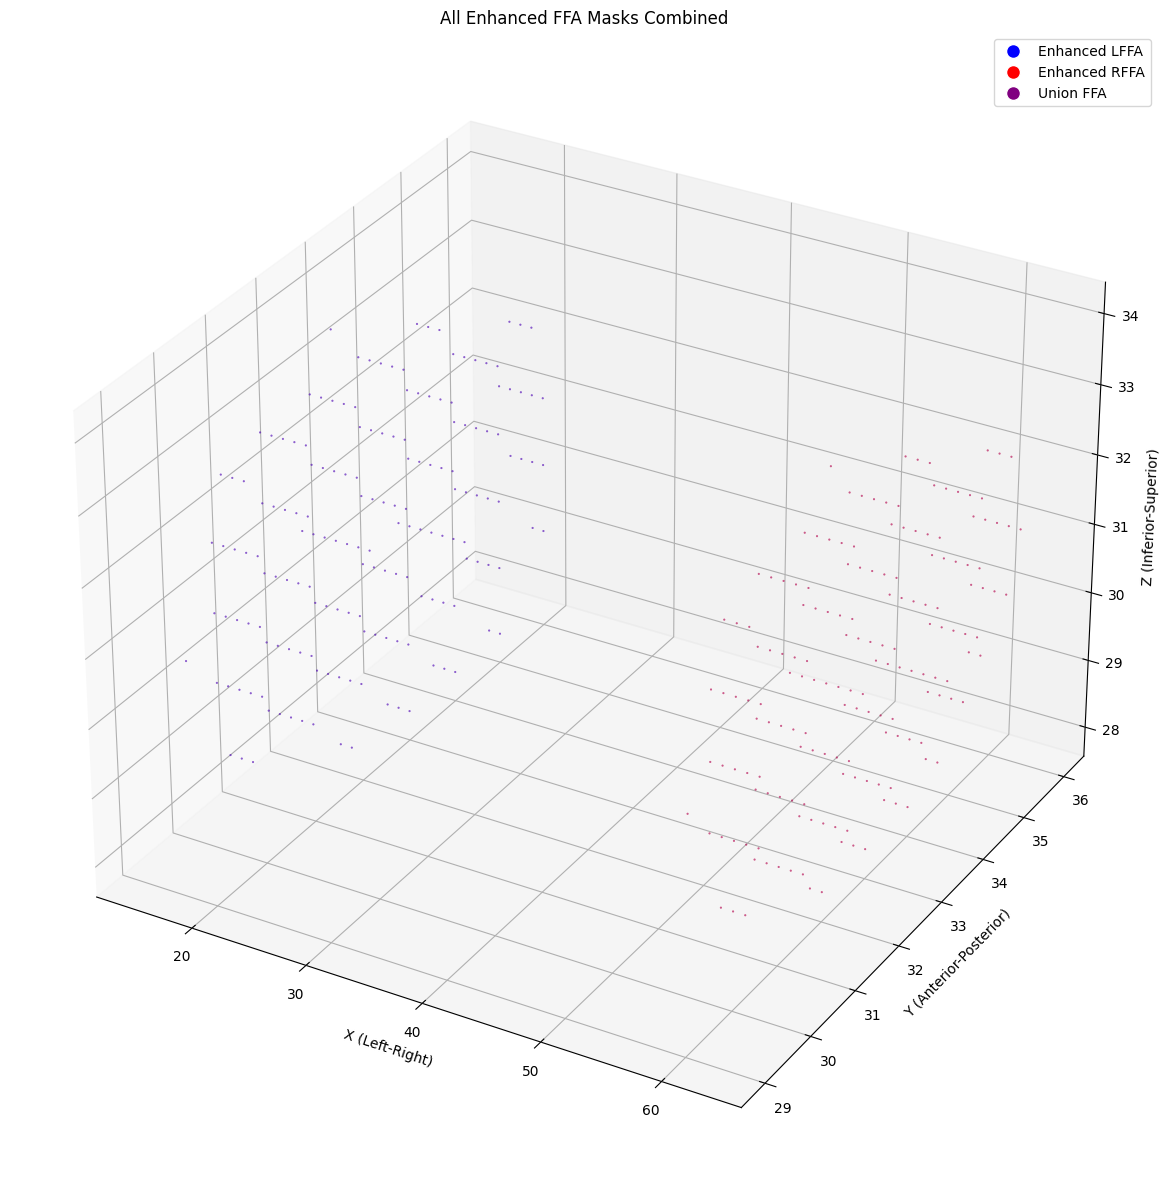


Creating voxel plots...
Creating voxel plot for Enhanced LFFA...


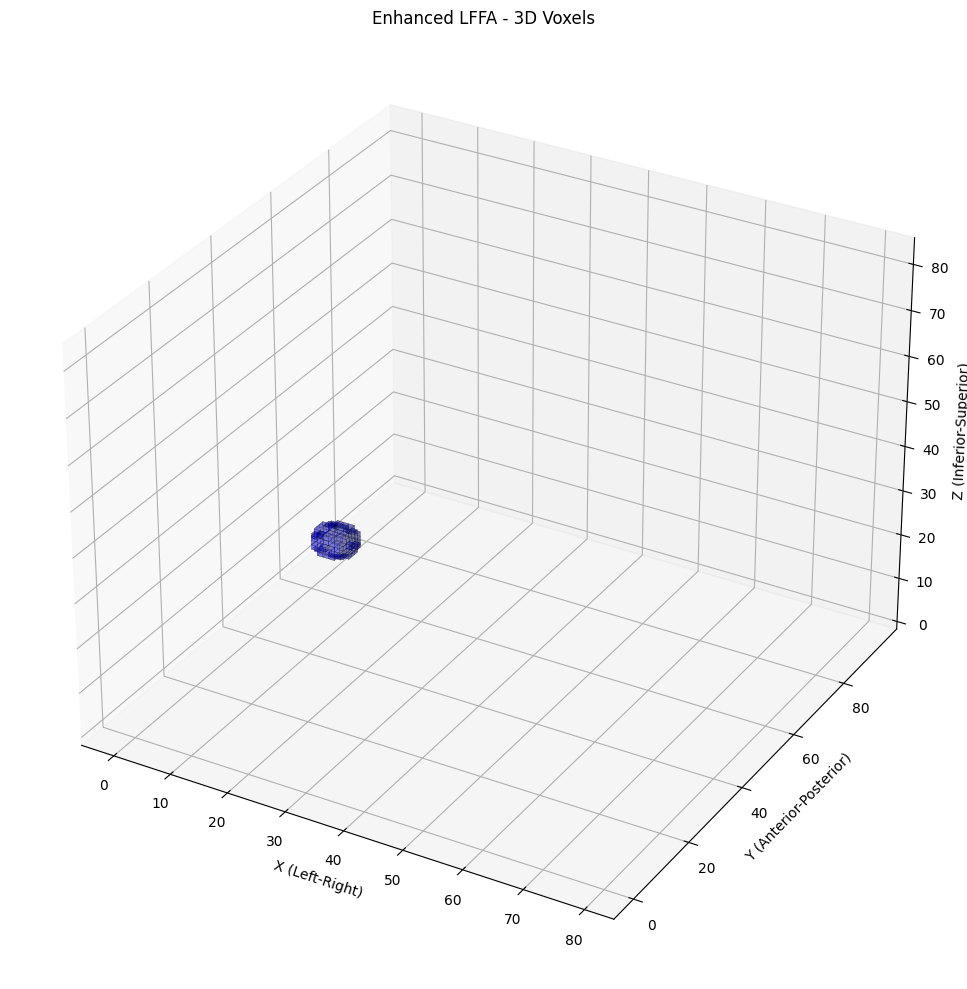

Creating voxel plot for Enhanced RFFA...


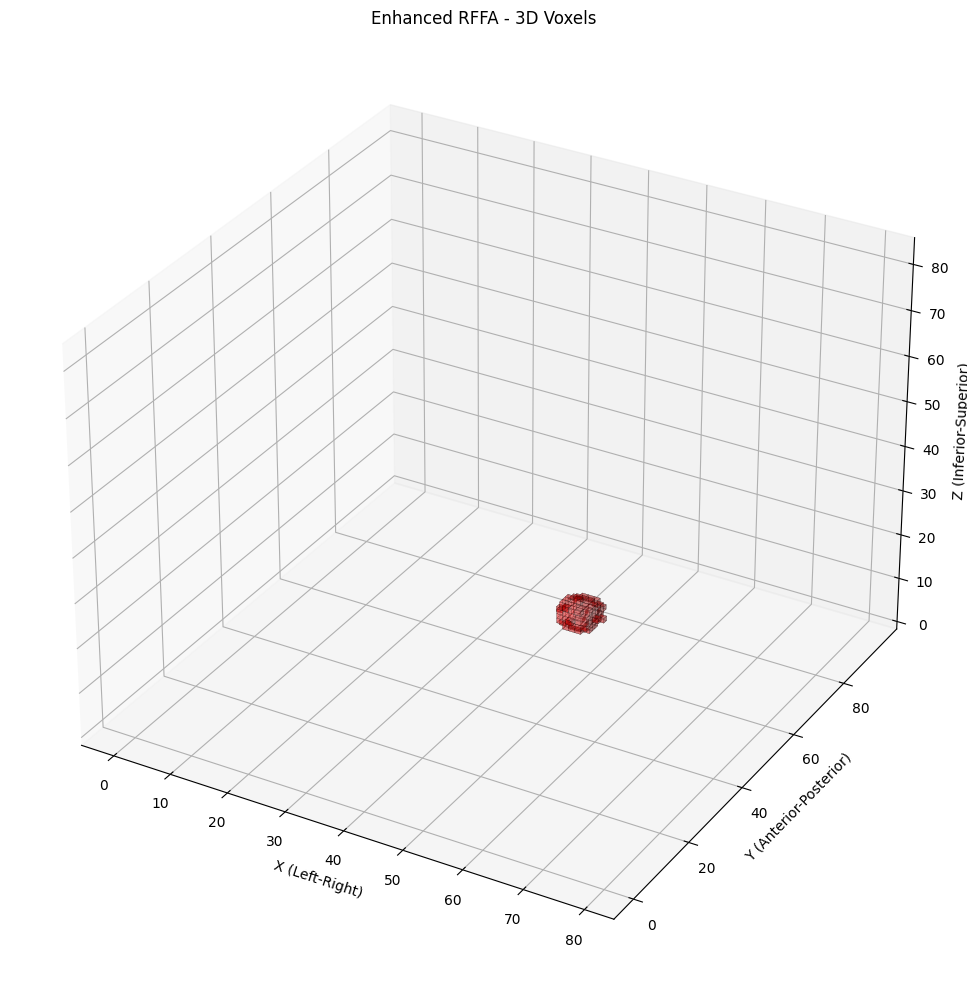

Creating voxel plot for Union FFA...


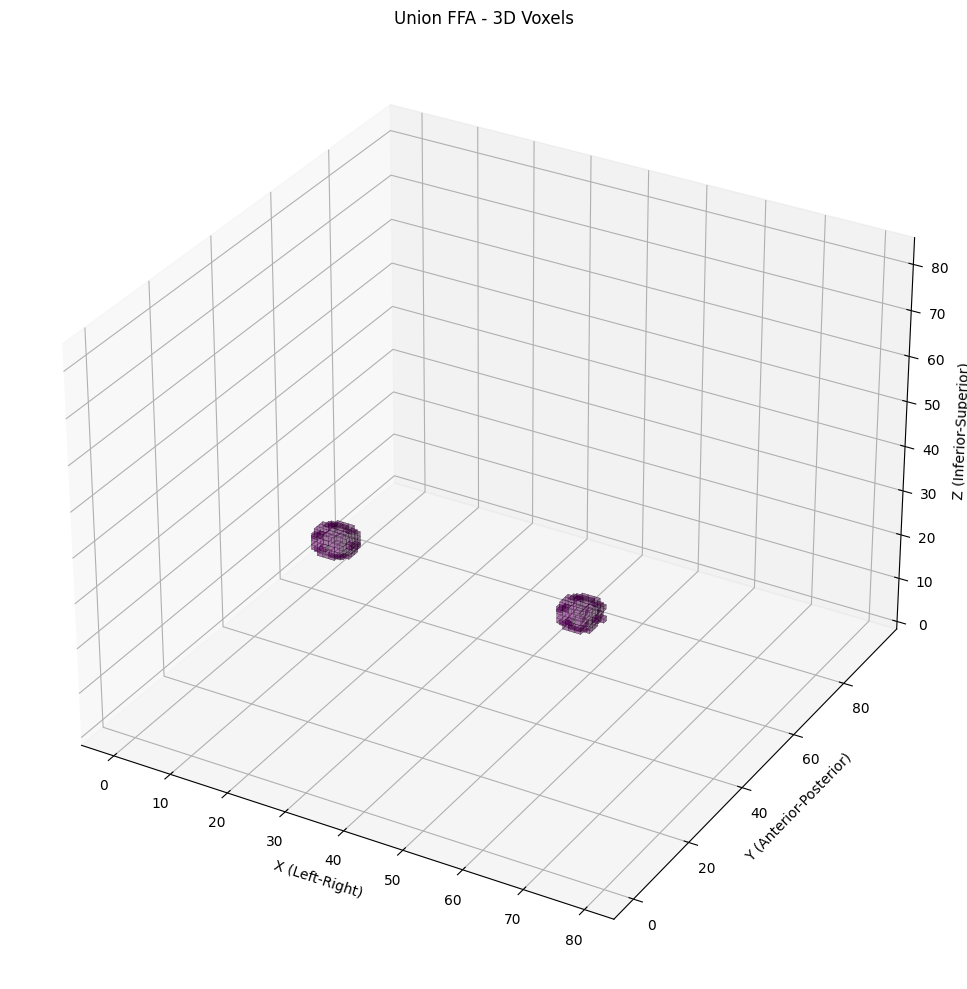


Creating slice views...


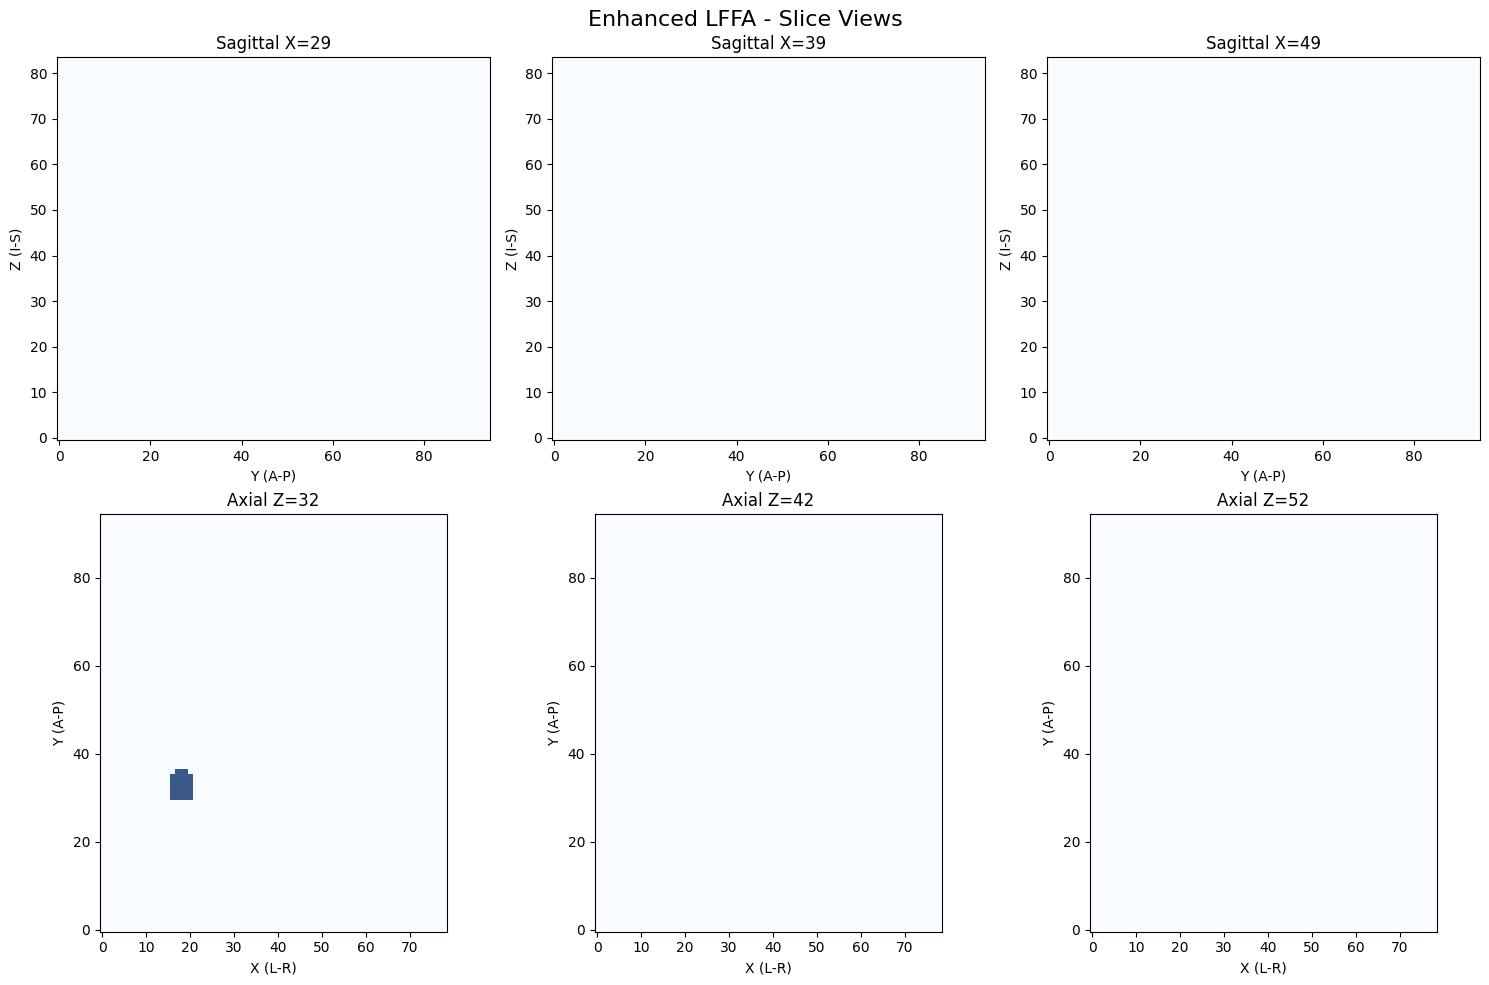

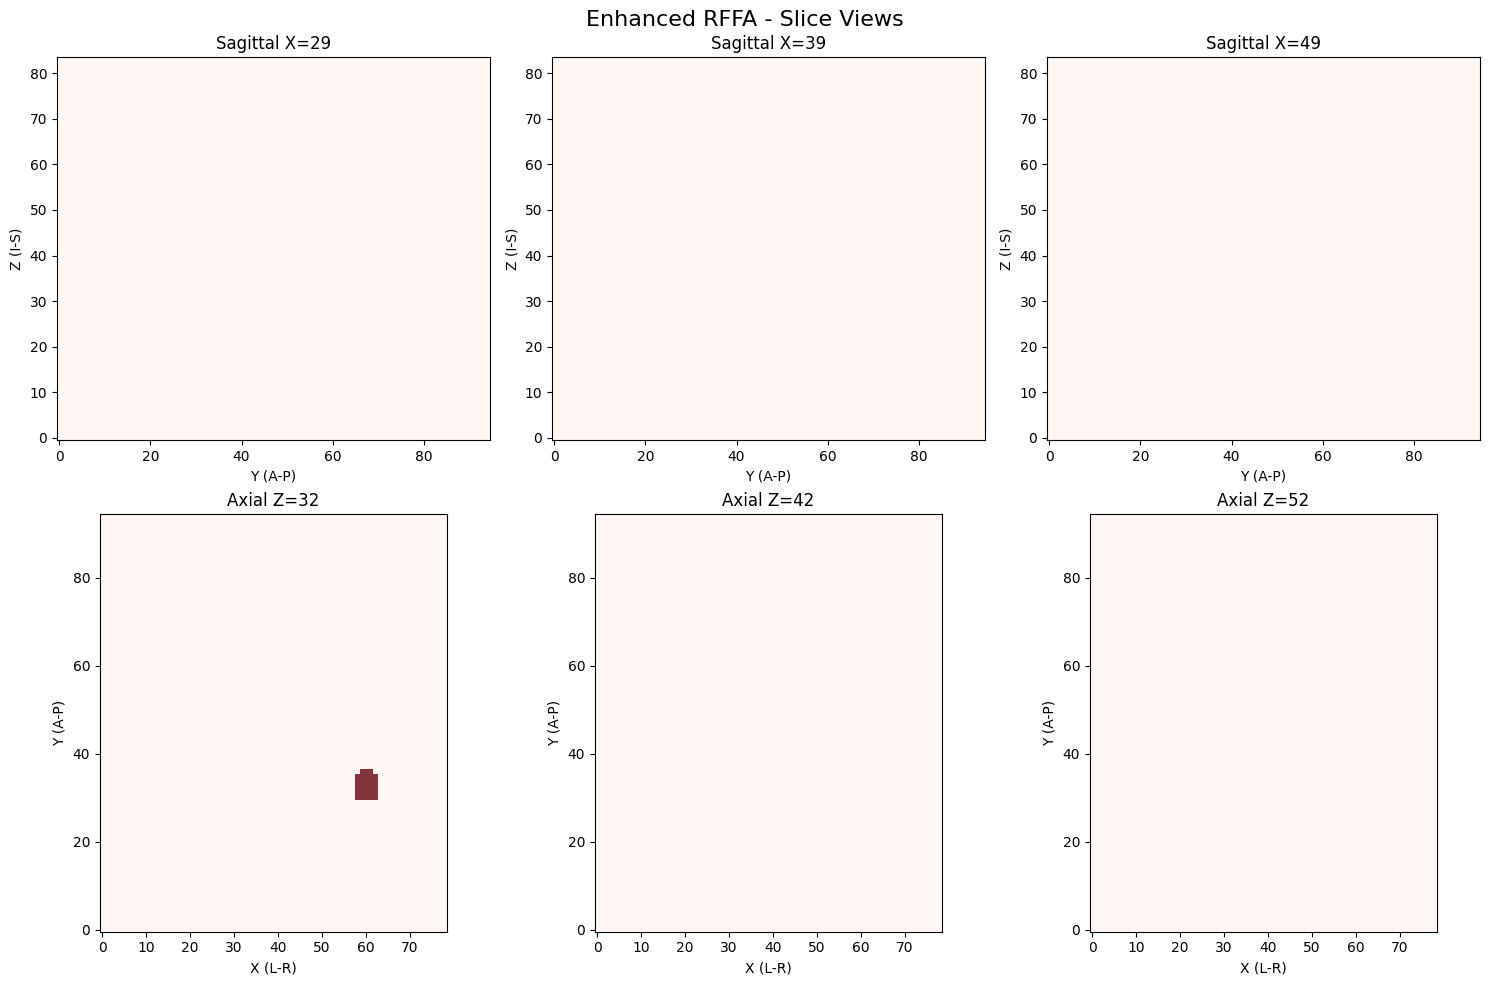

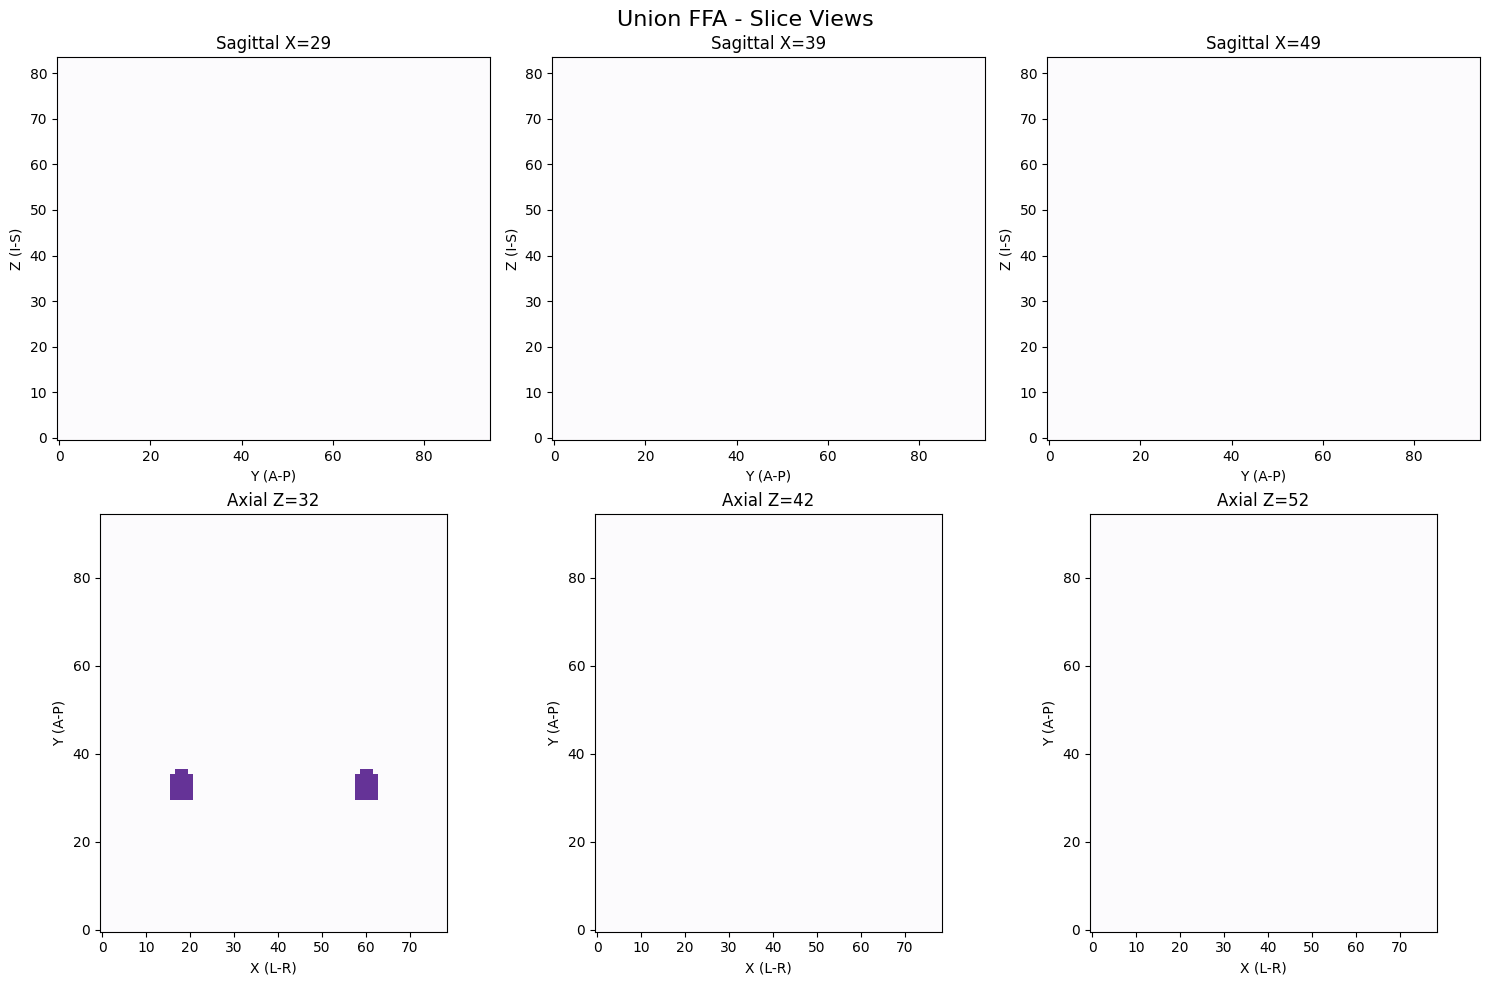


Creating interactive 3D plot with Plotly...



✅ 3D visualization complete!

Tip: Use mouse to rotate 3D plots for better viewing!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

def load_and_check_mask(filepath):
    """Load mask and return coordinates of active voxels"""
    if not os.path.exists(filepath):
        print(f"Warning: {filepath} not found!")
        return None
    
    mask = np.load(filepath)
    coords = np.where(mask)
    print(f"{filepath}: {len(coords[0])} active voxels")
    return coords

def plot_3d_mask(coords, title, color='red', alpha=0.6, ax=None):
    """Plot 3D scatter of mask coordinates"""
    if coords is None:
        return None
        
    if ax is None:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
    
    # Plot as 3D scatter
    ax.scatter(coords[0], coords[1], coords[2], 
              c=color, alpha=alpha, s=1, marker='.')
    
    ax.set_xlabel('X (Left-Right)')
    ax.set_ylabel('Y (Anterior-Posterior)')
    ax.set_zlabel('Z (Inferior-Superior)')
    ax.set_title(title)
    
    return ax

def plot_3d_voxels(mask, title, color='red', alpha=0.3):
    """Plot 3D voxels using matplotlib's voxels function"""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create voxel plot
    ax.voxels(mask, facecolors=color, alpha=alpha, edgecolors='k', linewidth=0.1)
    
    ax.set_xlabel('X (Left-Right)')
    ax.set_ylabel('Y (Anterior-Posterior)')
    ax.set_zlabel('Z (Inferior-Superior)')
    ax.set_title(title)
    
    return ax

def create_all_visualizations():
    """Create comprehensive 3D visualizations of all masks"""
    
    # File paths
    files = {
        'Enhanced LFFA': 'enhanced_LFFA.npy',
        'Enhanced RFFA': 'enhanced_RFFA.npy', 
        'Union FFA': 'union_FFA.npy'
    }
    
    colors = {
        'Enhanced LFFA': 'blue',
        'Enhanced RFFA': 'red',
        'Union FFA': 'purple'
    }
    
    # Load all masks
    print("Loading masks...")
    masks = {}
    coords = {}
    
    for name, filepath in files.items():
        if os.path.exists(filepath):
            mask = np.load(filepath)
            masks[name] = mask
            coords[name] = np.where(mask)
            print(f"{name}: {np.sum(mask)} active voxels, shape {mask.shape}")
        else:
            print(f"⚠️  {filepath} not found!")
    
    if not masks:
        print("❌ No mask files found! Please run the mask creation script first.")
        return
    
    # 1. Individual scatter plots
    print("\nCreating individual 3D scatter plots...")
    for name in masks.keys():
        plt.figure(figsize=(10, 8))
        ax = plot_3d_mask(coords[name], f"{name} - 3D Scatter", 
                         color=colors[name], alpha=0.6)
        plt.tight_layout()
        plt.show()
    
    # 2. Combined view
    if len(masks) > 1:
        print("\nCreating combined view...")
        fig = plt.figure(figsize=(15, 12))
        ax = fig.add_subplot(111, projection='3d')
        
        for name in masks.keys():
            plot_3d_mask(coords[name], "Combined FFA Masks", 
                        color=colors[name], alpha=0.4, ax=ax)
        
        # Add legend
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor=colors[name], markersize=10, label=name) 
                          for name in masks.keys()]
        ax.legend(handles=legend_elements, loc='upper right')
        ax.set_title("All Enhanced FFA Masks Combined")
        plt.tight_layout()
        plt.show()
    
    # 3. Voxel plots (for smaller masks - can be memory intensive)
    print("\nCreating voxel plots...")
    for name, mask in masks.items():
        total_voxels = np.sum(mask)
        if total_voxels < 50000:  # Only for reasonably sized masks
            print(f"Creating voxel plot for {name}...")
            plot_3d_voxels(mask, f"{name} - 3D Voxels", 
                          color=colors[name], alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Skipping voxel plot for {name} (too many voxels: {total_voxels})")
    
    # 4. Slice views at different depths
    print("\nCreating slice views...")
    create_slice_views(masks, colors)

def create_slice_views(masks, colors):
    """Create 2D slice views at different depths"""
    for name, mask in masks.items():
        if mask.size == 0:
            continue
            
        # Get mask dimensions
        shape = mask.shape
        
        # Create figure with subplots for different slice orientations
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle(f"{name} - Slice Views", fontsize=16)
        
        # Sagittal slices (YZ plane)
        mid_x = shape[0] // 2
        for i, offset in enumerate([-10, 0, 10]):
            slice_idx = max(0, min(shape[0]-1, mid_x + offset))
            axes[0, i].imshow(mask[slice_idx, :, :].T, 
                            cmap='Reds' if 'RFFA' in name else 'Blues' if 'LFFA' in name else 'Purples',
                            origin='lower', alpha=0.8)
            axes[0, i].set_title(f'Sagittal X={slice_idx}')
            axes[0, i].set_xlabel('Y (A-P)')
            axes[0, i].set_ylabel('Z (I-S)')
        
        # Axial slices (XY plane)  
        mid_z = shape[2] // 2
        for i, offset in enumerate([-10, 0, 10]):
            slice_idx = max(0, min(shape[2]-1, mid_z + offset))
            axes[1, i].imshow(mask[:, :, slice_idx].T,
                            cmap='Reds' if 'RFFA' in name else 'Blues' if 'LFFA' in name else 'Purples',
                            origin='lower', alpha=0.8)
            axes[1, i].set_title(f'Axial Z={slice_idx}')
            axes[1, i].set_xlabel('X (L-R)')
            axes[1, i].set_ylabel('Y (A-P)')
        
        plt.tight_layout()
        plt.show()

def create_interactive_plot():
    """Create an interactive 3D plot if possible"""
    try:
        import plotly.graph_objects as go
        import plotly.express as px
        
        print("\nCreating interactive 3D plot with Plotly...")
        
        # Load masks
        files = ['enhanced_LFFA.npy', 'enhanced_RFFA.npy', 'union_FFA.npy']
        names = ['Enhanced LFFA', 'Enhanced RFFA', 'Union FFA']
        colors = ['blue', 'red', 'purple']
        
        fig = go.Figure()
        
        for filepath, name, color in zip(files, names, colors):
            if os.path.exists(filepath):
                mask = np.load(filepath)
                coords = np.where(mask)
                
                fig.add_trace(go.Scatter3d(
                    x=coords[0], y=coords[1], z=coords[2],
                    mode='markers',
                    marker=dict(size=2, color=color, opacity=0.6),
                    name=name
                ))
        
        fig.update_layout(
            title="Interactive 3D Brain Masks",
            scene=dict(
                xaxis_title="X (Left-Right)",
                yaxis_title="Y (Anterior-Posterior)", 
                zaxis_title="Z (Inferior-Superior)"
            )
        )
        
        fig.show()
        
    except ImportError:
        print("Plotly not available. Install with: pip install plotly")

# Main execution
if __name__ == "__main__":
    print("🧠 3D Brain Mask Visualization")
    print("=" * 40)
    
    # Check if mask files exist
    required_files = ['enhanced_LFFA.npy', 'enhanced_RFFA.npy', 'union_FFA.npy']
    missing_files = [f for f in required_files if not os.path.exists(f)]
    
    if missing_files:
        print(f"❌ Missing files: {missing_files}")
        print("Please run the mask creation script first!")
    else:
        # Create all visualizations
        create_all_visualizations()
        
        # Try interactive plot
        create_interactive_plot()
        
        print("\n✅ 3D visualization complete!")
        print("\nTip: Use mouse to rotate 3D plots for better viewing!")

In [9]:
import numpy as np
import os

def load_mask(filepath):
    """Load mask from .npy format"""
    return np.load(filepath).astype(bool)  # Ensure boolean mask

def reflect_mask_lr(mask):
    """Reflect mask across left-right axis (sagittal plane)"""
    # Assuming standard neuroimaging orientation where first dimension is left-right
    return np.flip(mask, axis=0)

def create_enhanced_masks(lffa_path, rffa_path, output_dir="."):
    """
    Create enhanced FFA masks by combining original regions with their reflections
    
    Parameters:
    lffa_path: Path to left FFA mask
    rffa_path: Path to right FFA mask  
    output_dir: Directory to save output files
    """
    
    # Load original masks
    print("Loading original masks...")
    lffa_original = load_mask(lffa_path)
    rffa_original = load_mask(rffa_path)
    
    print(f"LFFA original shape: {lffa_original.shape}")
    print(f"RFFA original shape: {rffa_original.shape}")
    
    # Check that masks have the same shape
    if lffa_original.shape != rffa_original.shape:
        raise ValueError("LFFA and RFFA masks must have the same dimensions")
    
    # Create reflections
    print("Creating reflected masks...")
    lffa_reflected = reflect_mask_lr(lffa_original)  # Reflect LFFA to right side
    rffa_reflected = reflect_mask_lr(rffa_original)  # Reflect RFFA to left side
    
    # Create enhanced masks
    print("Combining original + reflected masks...")
    # New RFFA = original RFFA + reflected LFFA
    enhanced_rffa = rffa_original | lffa_reflected
    
    # New LFFA = original LFFA + reflected RFFA  
    enhanced_lffa = lffa_original | rffa_reflected
    
    # Create union of both enhanced masks
    print("Creating union mask...")
    union_mask = enhanced_lffa | enhanced_rffa
    
    # Save all masks
    output_files = {
        'enhanced_LFFA.npy': enhanced_lffa,
        'enhanced_RFFA.npy': enhanced_rffa, 
        'union_FFA.npy': union_mask
    }
    
    print("Saving enhanced masks...")
    for filename, mask in output_files.items():
        output_path = os.path.join(output_dir, filename)
        np.save(output_path, mask)
        print(f"Saved: {output_path}")
        print(f"  Shape: {mask.shape}")
        print(f"  Non-zero voxels: {np.sum(mask)}")
    
    return enhanced_lffa, enhanced_rffa, union_mask

def visualize_mask_stats(original_lffa, original_rffa, enhanced_lffa, enhanced_rffa, union_mask):
    """Print statistics about the masks"""
    print("\n=== MASK STATISTICS ===")
    print(f"Original LFFA voxels: {np.sum(original_lffa)}")
    print(f"Original RFFA voxels: {np.sum(original_rffa)}")
    print(f"Enhanced LFFA voxels: {np.sum(enhanced_lffa)}")
    print(f"Enhanced RFFA voxels: {np.sum(enhanced_rffa)}")
    print(f"Union mask voxels: {np.sum(union_mask)}")
    print(f"Overlap between enhanced masks: {np.sum(enhanced_lffa & enhanced_rffa)}")

# Main execution
if __name__ == "__main__":
    # Define paths to your mask files
    lffa_path = "resampled_lffa.npy"
    rffa_path = "resampled_rffa.npy"
    
    # Check if files exist
    if not os.path.exists(lffa_path):
        print(f"Warning: {lffa_path} not found. Please check the file path.")
    if not os.path.exists(rffa_path):
        print(f"Warning: {rffa_path} not found. Please check the file path.")
    
    try:
        # Create enhanced masks
        enhanced_lffa, enhanced_rffa, union_mask = create_enhanced_masks(
            lffa_path, rffa_path, output_dir="."
        )
        
        # Load original masks for comparison
        original_lffa = load_mask(lffa_path)
        original_rffa = load_mask(rffa_path)
        
        # Show statistics
        visualize_mask_stats(original_lffa, original_rffa, enhanced_lffa, enhanced_rffa, union_mask)
        
        print("\n✅ Successfully created enhanced FFA masks!")
        
    except Exception as e:
        print(f"❌ Error: {e}")
        print("Please check your file paths and formats.")

Loading original masks...
LFFA original shape: (91, 109, 91)
RFFA original shape: (91, 109, 91)
Creating reflected masks...
Combining original + reflected masks...
Creating union mask...
Saving enhanced masks...
Saved: ./enhanced_LFFA.npy
  Shape: (91, 109, 91)
  Non-zero voxels: 167
Saved: ./enhanced_RFFA.npy
  Shape: (91, 109, 91)
  Non-zero voxels: 167
Saved: ./union_FFA.npy
  Shape: (91, 109, 91)
  Non-zero voxels: 334

=== MASK STATISTICS ===
Original LFFA voxels: 123
Original RFFA voxels: 100
Enhanced LFFA voxels: 167
Enhanced RFFA voxels: 167
Union mask voxels: 334
Overlap between enhanced masks: 0

✅ Successfully created enhanced FFA masks!


In [11]:
new_lffa = np.load('enhanced_RFFA.npy')
print(new_lffa.shape)

(91, 109, 91)
